<a href="https://colab.research.google.com/github/habiba-226/Tanzania_Tourism_Prediction/blob/main/Tanzania_Tourism_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Can you use tourism survey data and ML to predict how much money a tourist will spend when visiting Tanzania?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the dataset from drive
train_df = pd.read_csv("/content/drive/MyDrive/Data_Analytics_Project/Train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Data_Analytics_Project/Test.csv")
sample_df = pd.read_csv("/content/drive/MyDrive/Data_Analytics_Project/SampleSubmission.csv")
variables_df = pd.read_csv("/content/drive/MyDrive/Data_Analytics_Project/VariableDefinitions.csv")

original_train_df = train_df.copy()
original_test_df = test_df.copy()
# Load the dataset sample data
# train_df = pd.read_csv("sample_data/Train.csv")
# test_df = pd.read_csv("sample_data/Test.csv")
# sample_df = pd.read_csv("sample_data/SampleSubmission.csv")
# variables_df = pd.read_csv("sample_data/VariableDefinitions.csv")

#**Data Overview**

In [ ]:
print(variables_df.head(23))

              Column Name                                         Definition
0                      id                 Unique identifier for each tourist
1                 country                The country a tourist coming  from.
2               age_group                        The age group of a tourist.
3             travel_with  The relation of people a tourist travel with t...
4            total_female                            Total number of females
5              total_male                              Total number of males
6                 purpose                  The purpose of visiting  Tanzania
7           main_activity           The main activity of tourism in Tanzania
8            infor_source  The source of information about tourism in Tan...
9         tour_arrangment                The arrangment of visiting Tanzania
10  package_transport_int  If the tour package include international tran...
11   package_accomodation  If the tour package include accommodation service

In [ ]:
print(train_df.head())
print(train_df.columns.tolist())
train_df.info()
train_df.describe()

          ID         country age_group        travel_with  total_female  \
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0   
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity  \
0         1.0            Leisure and Holidays  Wildlife tourism   
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_transport_tz  \
0            Friends, relatives      Independent  ...               

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [ ]:
print(sample_df.head())

          ID  total_cost
0     tour_1           0
1   tour_100           0
2  tour_1001           0
3  tour_1006           0
4  tour_1009           0


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [ ]:
print("Data Types of Each Column:")
print(train_df.dtypes)

Data Types of Each Column:
ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object


In [ ]:
categorical_columns = train_df.select_dtypes(include="object").columns
numerical_columns = train_df.select_dtypes(include="number").columns

numerical_df = train_df.select_dtypes(include="number")
categorical_df = train_df.select_dtypes(include="object")

In [ ]:
missing_train = train_df.isnull().sum()
missing_train_percent = 100 * missing_train / len(train_df)
missing_train_df = pd.DataFrame({'Missing Count': missing_train, 'Missing Percent': missing_train_percent})
print(missing_train_df[missing_train_df['Missing Count'] > 0].sort_values(by='Missing Percent', ascending=False))

                 Missing Count  Missing Percent
travel_with               1114        23.164899
most_impressing            313         6.508630
total_male                   5         0.103972
total_female                 3         0.062383


In [ ]:
print("Number of duplicates is:", train_df.duplicated().sum())

Number of duplicates is: 0


In [ ]:
print("Train DataFrame shape:", train_df.shape)

Train DataFrame shape: (4809, 23)


In [ ]:
# combine train and test for EDA
train = train_df.shape[0]
test = test_df.shape[0]
all_data_df = pd.concat((train_df,test_df)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data_df.shape}')

The shape of the combined dataframe is: (6410, 23)


In [ ]:
print("Number of Unique Values per Column:")
print(train_df.nunique())

Number of Unique Values per Column:
ID                       4809
country                   105
age_group                   4
travel_with                 5
total_female               14
total_male                 14
purpose                     7
main_activity               9
info_source                 8
tour_arrangement            2
package_transport_int       2
package_accomodation        2
package_food                2
package_transport_tz        2
package_sightseeing         2
package_guided_tour         2
package_insurance           2
night_mainland             64
night_zanzibar             34
payment_mode                4
first_trip_tz               2
most_impressing             7
total_cost               1637
dtype: int64


#**EDA**

##Non-Graphical Methods


###Univarient Non-Graphical EDA

####Analyzing Categorical Data

#####Frequency Tabulation

In [ ]:
categorical_columns = train_df.select_dtypes(include="object").columns
print("Statistics for Categorical Columns:", train_df.describe(include='object') )

if not categorical_columns.empty:  # Frequency of Unique Values in Categorical Columns
    for col in categorical_columns:
        print(f"\nColumn: {col}")
        print(train_df[col].value_counts())
else:
    print("No categorical columns found in the dataset.")

Statistics for Categorical Columns:               ID                   country age_group travel_with  \
count       4809                      4809      4809        3695   
unique      4809                       105         4           5   
top     tour_999  UNITED STATES OF AMERICA     25-44       Alone   
freq           1                       695      2487        1265   

                     purpose     main_activity                   info_source  \
count                   4809              4809                          4809   
unique                     7                 9                             8   
top     Leisure and Holidays  Wildlife tourism  Travel, agent, tour operator   
freq                    2840              2259                          1913   

       tour_arrangement package_transport_int package_accomodation  \
count              4809                  4809                 4809   
unique                2                     2                    2   
top         

In [ ]:
train_df.describe(include=['O']) # only include columns with the object data type

,ID,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,payment_mode,first_trip_tz,most_impressing
count,4809,4809,4809,3695,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4496
unique,4809,105,4,5,7,9,8,2,2,2,2,2,2,2,2,4,2,7
top,tour_999,UNITED STATES OF AMERICA,25-44,Alone,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,Cash,Yes,Friendly People
freq,1,695,2487,1265,2840,2259,1913,2570,3357,2602,2748,2919,3319,3259,4079,4172,3243,1541


In [ ]:
train_df.country.value_counts()

,count
country,
UNITED STATES OF AMERICA,695
UNITED KINGDOM,533
ITALY,393
FRANCE,280
ZIMBABWE,274
...,...
CYPRUS,1
URUGUAY,1
MORROCO,1


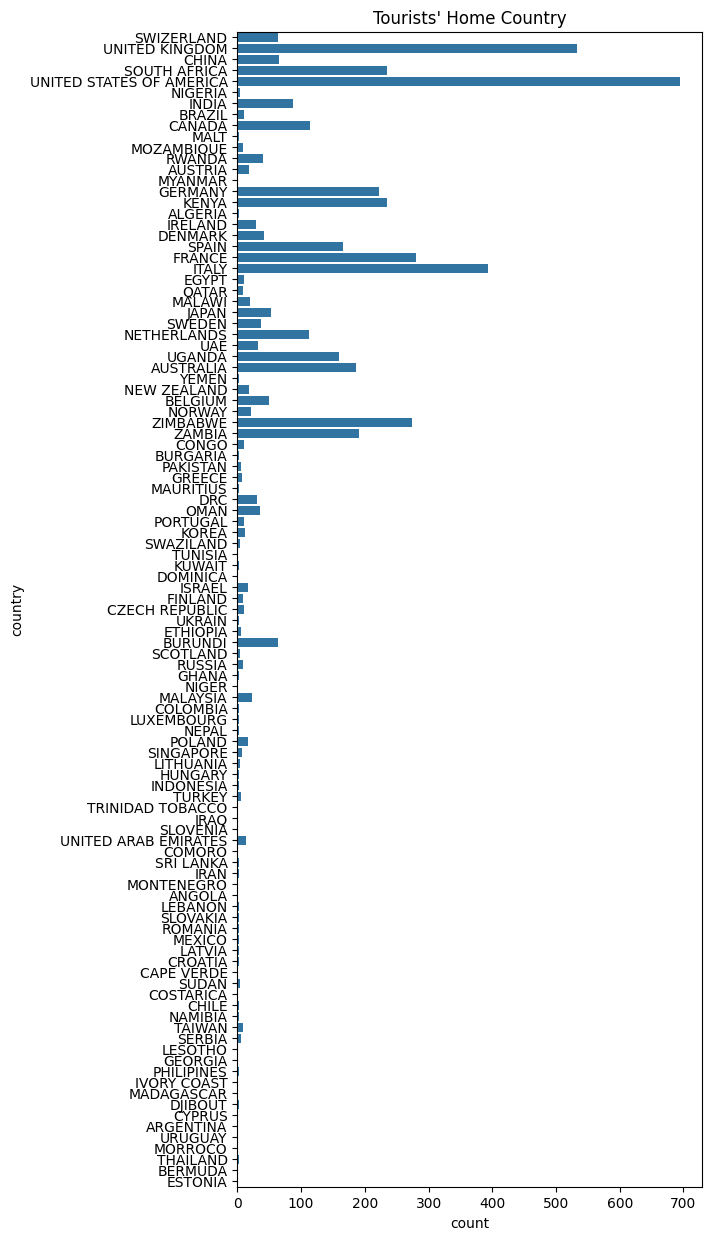

In [ ]:
train_df.country.value_counts()
plt.figure(figsize=(6,15))
sns.countplot(train_df['country'])
plt.title("Tourists' Home Country")
plt.show()

*United State of America leads with highest number of tourist, followed by United Kingdom then Italy*

In [ ]:
train_df.age_group.value_counts()

,count
age_group,
25-44,2487
45-64,1391
1-24,624
65+,307


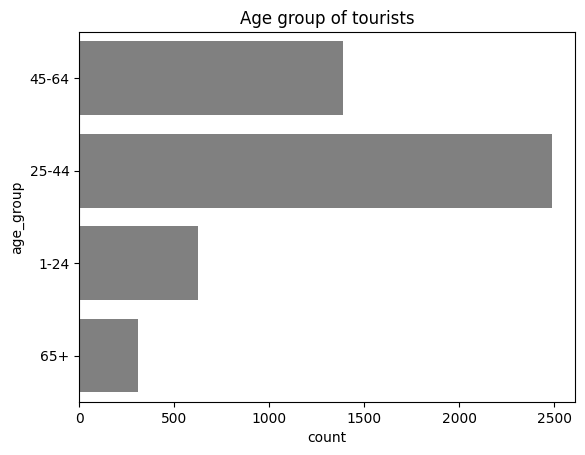

In [ ]:
sns.countplot(train_df['age_group'], color='gray')
plt.title("Age group of tourists")
plt.show()

*Most tourists are between 25-44 years*

In [ ]:
train_df.travel_with.value_counts()

,count
travel_with,
Alone,1265
Spouse,1005
Friends/Relatives,895
Spouse and Children,368
Children,162


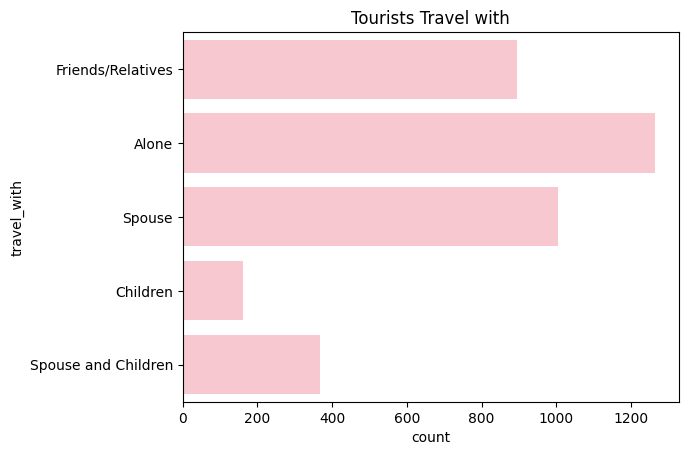

In [ ]:
sns.countplot(train_df['travel_with'], color='pink')
plt.title("Tourists Travel with")
plt.show()

*Most tourists travel alone or with a spouse*

In [ ]:
train_df.purpose.value_counts()

,count
purpose,
Leisure and Holidays,2840
Business,671
Visiting Friends and Relatives,633
Meetings and Conference,312
Volunteering,138
Other,128
Scientific and Academic,87


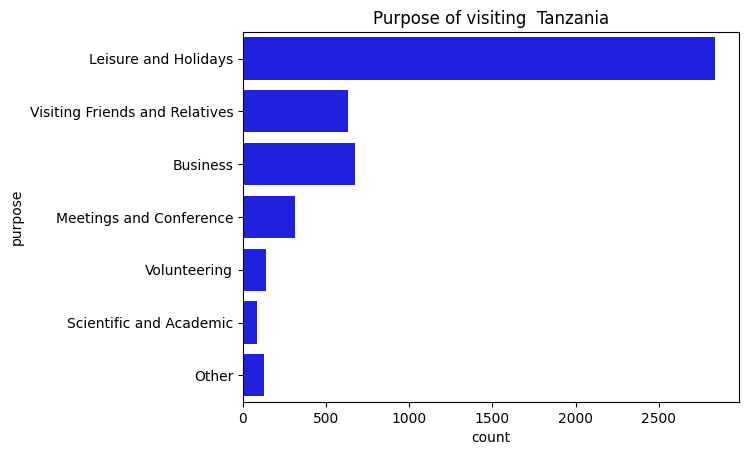

In [ ]:
sns.countplot(train_df['purpose'], color='blue')
plt.title("Purpose of visiting  Tanzania")
plt.show()

*Most tourists go for leisure and holidays (on vacation)*

In [ ]:
train_df.main_activity.value_counts()

,count
main_activity,
Wildlife tourism,2259
Beach tourism,1025
Hunting tourism,457
Conference tourism,367
Cultural tourism,359
Mountain climbing,234
business,58
Bird watching,37
Diving and Sport Fishing,13


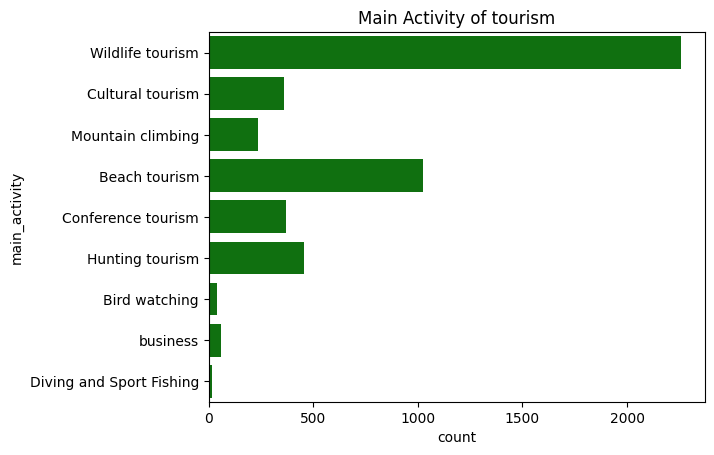

In [ ]:
sns.countplot(train_df['main_activity'], color='green')
plt.title("Main Activity of tourism")
plt.show()

*Most tourists visit for the wildlife and the beach*

In [ ]:
train_df.info_source.value_counts()

,count
info_source,
"Travel, agent, tour operator",1913
"Friends, relatives",1635
others,490
"Newspaper, magazines,brochures",359
"Radio, TV, Web",249
Trade fair,77
Tanzania Mission Abroad,68
inflight magazines,18


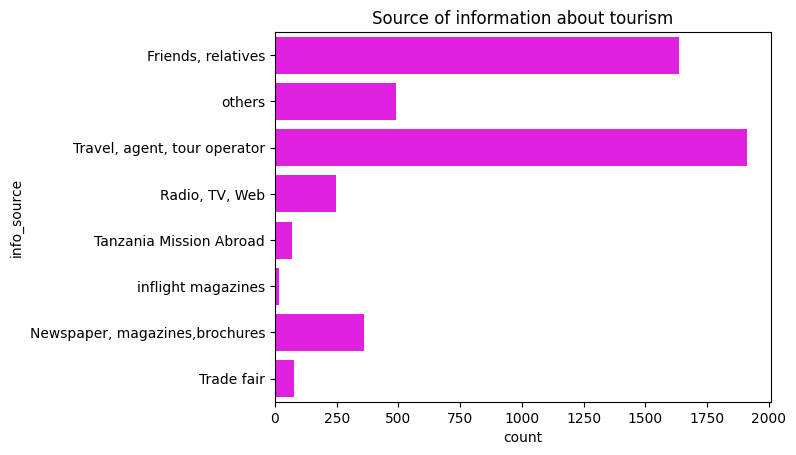

In [ ]:
sns.countplot(train_df['info_source'], color='magenta')
plt.title("Source of information about tourism")
plt.show()

*Most tourists hear about Tanzania Tourism from Travel agent and tour operator*

In [ ]:
train_df.tour_arrangement.value_counts()

,count
tour_arrangement,
Independent,2570
Package Tour,2239


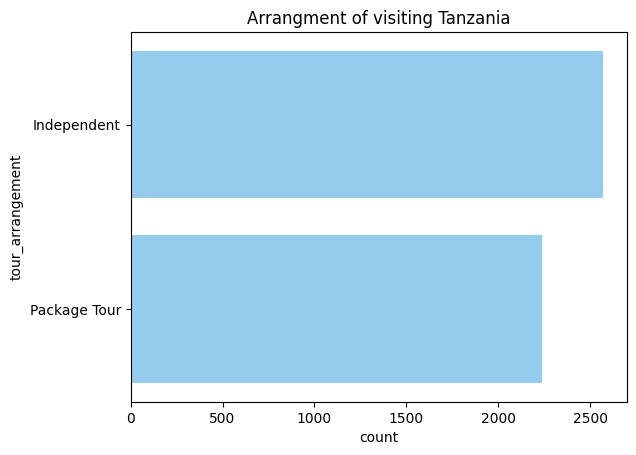

In [ ]:
sns.countplot(train_df['tour_arrangement'], color='lightskyblue')
plt.title("Arrangment of visiting Tanzania")
plt.show()

*Most tourists go independlty *

In [ ]:
train_df.package_transport_int.value_counts()

,count
package_transport_int,
No,3357
Yes,1452


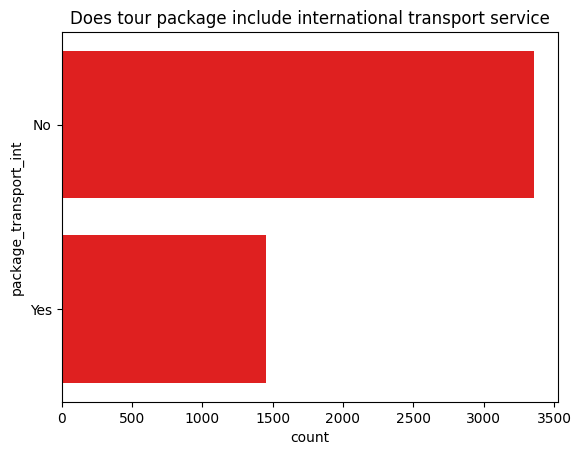

In [ ]:
sns.countplot(train_df['package_transport_int'], color='red')
plt.title("Does tour package include international transport service")
plt.show()

*Most tour packages don't include transport service*

In [ ]:
train_df.package_accomodation.value_counts()

,count
package_accomodation,
No,2602
Yes,2207


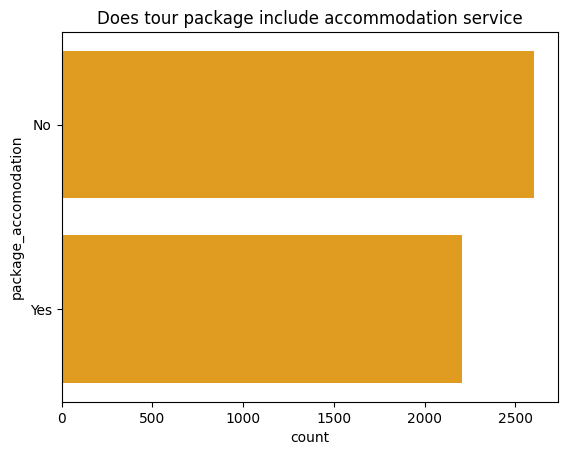

In [ ]:
sns.countplot(train_df['package_accomodation'], color='orange')
plt.title("Does tour package include accommodation service")
plt.show()

*Most tour packages don't include accommodation service*

In [ ]:
train_df.package_food.value_counts()

,count
package_food,
No,2748
Yes,2061


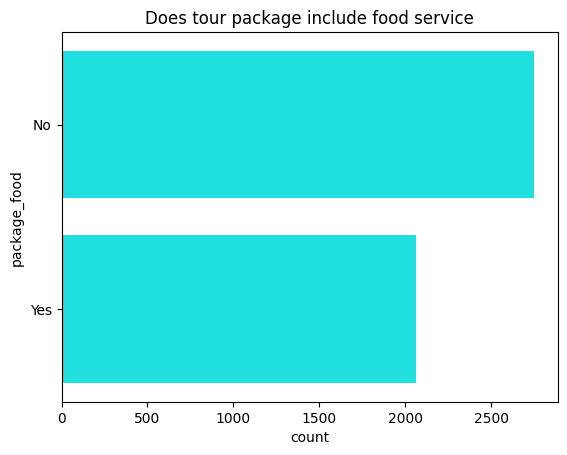

In [ ]:
sns.countplot(train_df['package_food'], color='cyan')
plt.title("Does tour package include food service")
plt.show()

*Most tour packages don't include food services*

In [ ]:
train_df.package_transport_tz.value_counts()

,count
package_transport_tz,
No,2919
Yes,1890


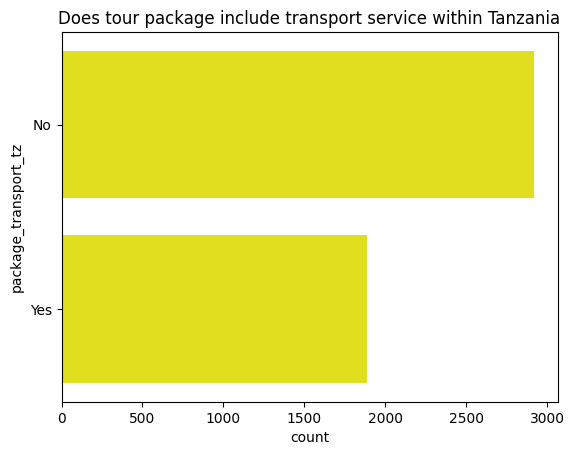

In [ ]:
sns.countplot(train_df['package_transport_tz'], color='yellow')
plt.title("Does tour package include transport service within Tanzania")
plt.show()

*Most tour packages don't include transport service within Tanzania*

In [ ]:
train_df.package_sightseeing.value_counts()

,count
package_sightseeing,
No,3319
Yes,1490


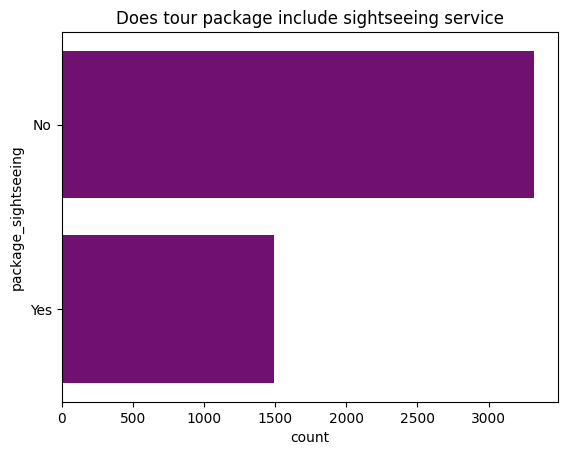

In [ ]:
sns.countplot(train_df['package_sightseeing'], color='purple')
plt.title("Does tour package include sightseeing service")
plt.show()

*Most tour packages don't include sightseeing service*

In [ ]:
train_df.package_guided_tour.value_counts()

,count
package_guided_tour,
No,3259
Yes,1550


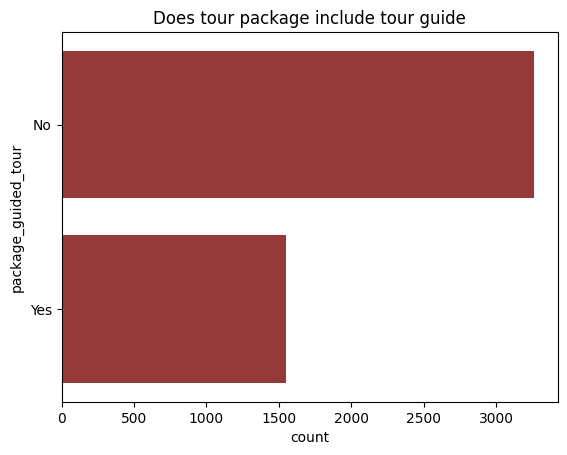

In [ ]:
sns.countplot(train_df['package_guided_tour'], color='brown')
plt.title("Does tour package include tour guide")
plt.show()

*Most tour packages don't include  tour guide*

In [ ]:
train_df.package_insurance.value_counts()

,count
package_insurance,
No,4079
Yes,730


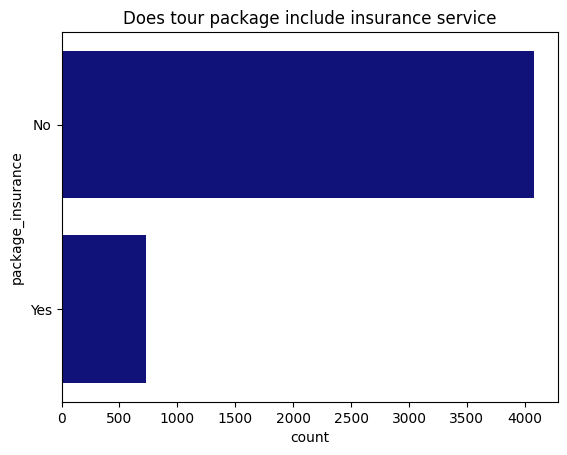

In [ ]:
sns.countplot(train_df['package_insurance'], color='darkblue')
plt.title("Does tour package include insurance service")
plt.show()

*Most tour packages don't include insurance service*

In [ ]:
train_df.payment_mode.value_counts()

,count
payment_mode,
Cash,4172
Credit Card,622
Other,8
Travellers Cheque,7


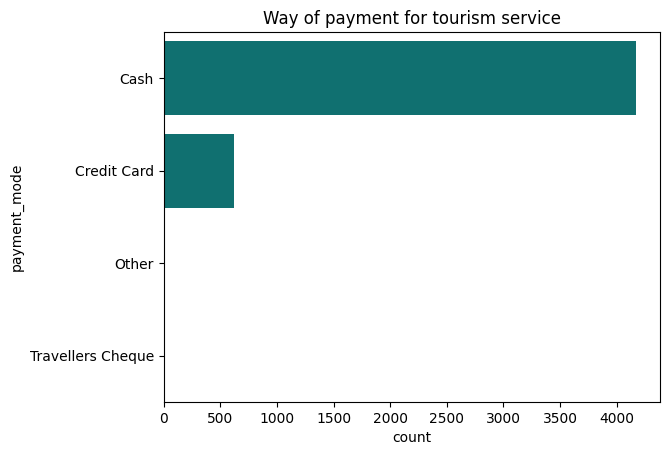

In [ ]:
sns.countplot(train_df['payment_mode'], color='teal')
plt.title("Way of payment for tourism service")
plt.show()

*Most tourists pay using cash*

In [ ]:
train_df.first_trip_tz.value_counts()

,count
first_trip_tz,
Yes,3243
No,1566


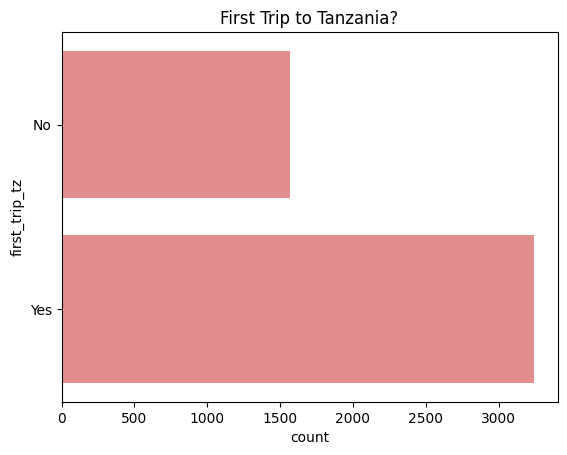

In [ ]:
sns.countplot(train_df['first_trip_tz'], color='lightcoral')
plt.title("First Trip to Tanzania?")
plt.show()

*This is most tourists first trip to Tanzania*

In [ ]:
train_df.most_impressing.value_counts()

,count
most_impressing,
Friendly People,1541
Wildlife,1038
No comments,743
"Wonderful Country, Landscape, Nature",507
Good service,365
Excellent Experience,271
Satisfies and Hope Come Back,31


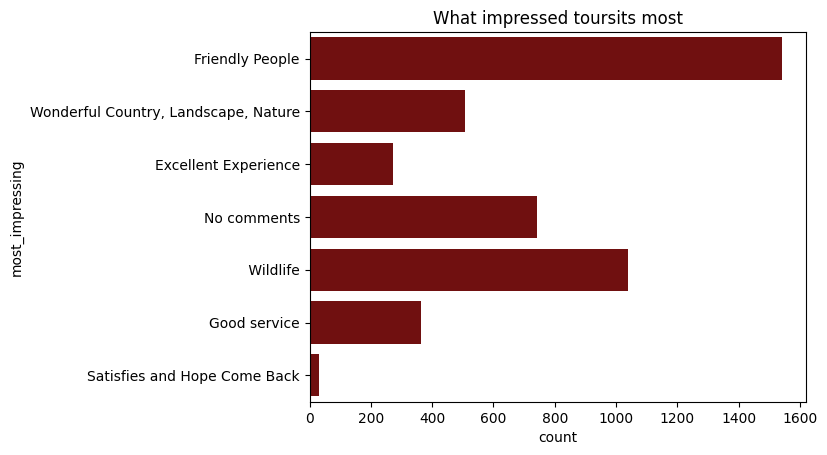

In [ ]:
sns.countplot(train_df['most_impressing'], color='maroon')
plt.title("What impressed toursits most")
plt.show()

*Most tourists found friendly people and wildlife most impressing*

####Analyzing Numerical Data


#####Central Tendency Measures and Spread Measures

In [ ]:
numerical_df = train_df.select_dtypes(include="number")
variance = numerical_df.var()
mode = numerical_df.mode()
print("Statistics for Numerical Columns:", train_df.describe())
print(f"Variancet: {variance}")
print(f"Mode: {mode}")

Statistics for Numerical Columns:        total_female   total_male  night_mainland  night_zanzibar    total_cost
count   4806.000000  4804.000000     4809.000000     4809.000000  4.809000e+03
mean       0.926758     1.009575        8.488043        2.304429  8.114389e+06
std        1.288242     1.138865       10.427624        4.227080  1.222490e+07
min        0.000000     0.000000        0.000000        0.000000  4.900000e+04
25%        0.000000     1.000000        3.000000        0.000000  8.121750e+05
50%        1.000000     1.000000        6.000000        0.000000  3.397875e+06
75%        1.000000     1.000000       11.000000        4.000000  9.945000e+06
max       49.000000    44.000000      145.000000       61.000000  9.953288e+07
Variancet: total_female      1.659567e+00
total_male        1.297014e+00
night_mainland    1.087353e+02
night_zanzibar    1.786820e+01
total_cost        1.494483e+14
dtype: float64
Mode:    total_female  total_male  night_mainland  night_zanzibar  total_c

In [ ]:
print("Target Variable (total_cost) description")
print(train_df['total_cost'].describe())
variance_total_cost = train_df['total_cost'].var()
mode_total_cost = train_df['total_cost'].mode()
print(f"Variance: {variance_total_cost}")
print(f"Mode: {mode_total_cost}")

# Calculate IQR
Q1_tc = train_df['total_cost'].quantile(0.25)
print(f"Q1 (25th percentile) of total_cost: {Q1_tc}")

Q3_tc = train_df['total_cost'].quantile(0.75)
print(f"Q3 (75th percentile) of total_cost: {Q3_tc}")

IQR_tc = Q3_tc - Q1_tc
print(f"IQR of total_cost: {IQR_tc}")

Target Variable (total_cost) description
count    4.809000e+03
mean     8.114389e+06
std      1.222490e+07
min      4.900000e+04
25%      8.121750e+05
50%      3.397875e+06
75%      9.945000e+06
max      9.953288e+07
Name: total_cost, dtype: float64
Variance: 149448259519963.25
Mode: 0    1657500.0
Name: total_cost, dtype: float64
Q1 (25th percentile) of total_cost: 812175.0
Q3 (75th percentile) of total_cost: 9945000.0
IQR of total_cost: 9132825.0


####Skewness and Kurtosis

In [ ]:
print("Skewness of Numerical Columns:")
print(numerical_df.skew())
kurtosis = numerical_df.kurt()
print(f"Kurtosisof Numerical Columns: \n{kurtosis}")

Skewness of Numerical Columns:
total_female      13.037028
total_male        13.810141
night_mainland     4.026044
night_zanzibar     4.226719
total_cost         2.967848
dtype: float64
Kurtosisof Numerical Columns: 
total_female      416.090526
total_male        445.338624
night_mainland     26.392706
night_zanzibar     35.987216
total_cost         11.431051
dtype: float64


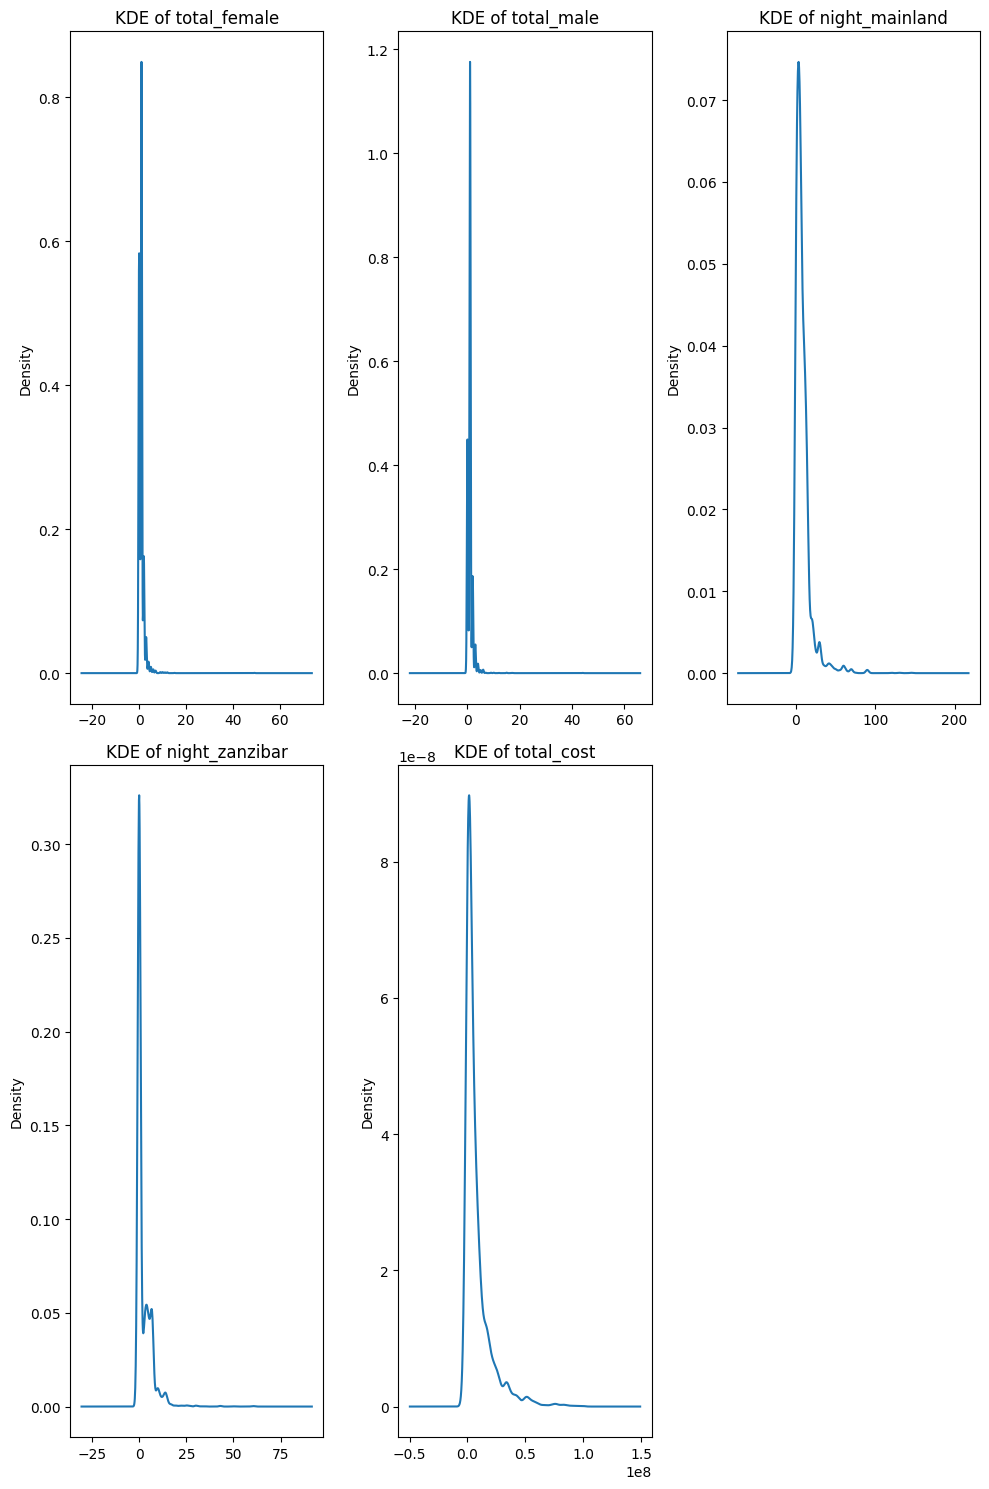

In [ ]:
numerical_columns = train_df.select_dtypes(include="number")
numerical_columns.skew()
plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_columns.columns.tolist()):
  plt.subplot(2,3,i+1)
  train_df[col].plot(kind='kde')
  plt.title(f"KDE of {col}")
plt.tight_layout()
plt.show()

###Multivarient Non-Graphical EDA

####Analyzing Categorical Data

#####Cross Tabulation

In [ ]:
cross_tab = pd.crosstab(train_df['country'], train_df['age_group'],margins=True)
cross_tab

age_group,1-24,25-44,45-64,65+,All
country,,,,,
ALGERIA,0,2,0,0,2
ANGOLA,0,0,1,0,1
ARGENTINA,0,0,1,0,1
AUSTRALIA,14,65,72,35,186
AUSTRIA,3,10,5,0,18
...,...,...,...,...,...
URUGUAY,0,1,0,0,1
YEMEN,0,0,2,0,2
ZAMBIA,10,147,32,2,191


In [ ]:
cross_tab = pd.crosstab(train_df['age_group'], train_df['travel_with'],margins=True)
cross_tab
##need to handle missing values in travel_with

travel_with,Alone,Children,Friends/Relatives,Spouse,Spouse and Children,All
age_group,,,,,,
1-24,234,4,154,41,12,445
25-44,697,61,499,487,130,1874
45-64,275,87,200,332,219,1113
65+,59,10,42,145,7,263
All,1265,162,895,1005,368,3695


In [ ]:
cross_tab = pd.crosstab(train_df['age_group'], train_df['most_impressing'],margins=True)
cross_tab
##need to handle missing data of most impressive

most_impressing,Wildlife,Excellent Experience,Friendly People,Good service,No comments,Satisfies and Hope Come Back,"Wonderful Country, Landscape, Nature",All
age_group,,,,,,,,
1-24,119,31,178,72,102,1,87,590
25-44,511,134,765,189,408,16,267,2290
45-64,301,91,488,89,205,13,129,1316
65+,107,15,110,15,28,1,24,300
All,1038,271,1541,365,743,31,507,4496


####Analyzing Numerical Data


#####Group-by Aggregation

In [ ]:
country_avg_spending = pd.DataFrame(train_df.groupby(['country'])['total_cost'].mean().sort_values(ascending=False))

print("Average Total Cost by Country:")
country_avg_spending.head() # Display top few countries by average spending

Average Total Cost by Country:


,total_cost
country,
DOMINICA,3.315000e+07
COSTARICA,2.718300e+07
SLOVENIA,1.906237e+07
TUNISIA,1.574625e+07
AUSTRALIA,1.474802e+07


In [ ]:
age_group_avg_spending  = pd.DataFrame(train_df.groupby(['age_group'])['total_cost'].mean().sort_values(ascending=False))
print("\nAverage Total Cost by Age Group:")
age_group_avg_spending.head()


Average Total Cost by Age Group:


,total_cost
age_group,
65+,1.721195e+07
45-64,1.105093e+07
25-44,6.026176e+06
1-24,5.415205e+06


In [ ]:
age_country_avg_spending  = pd.DataFrame(train_df.groupby(['country','age_group'])['total_cost'].mean().sort_values(ascending=False))
print("\nAverage Total Cost by Country and Age Group:")
age_country_avg_spending.head(15)


Average Total Cost by Country and Age Group:


,,total_cost
country,age_group,
SWEDEN,65+,5.221125e+07
NEW ZEALAND,65+,3.729375e+07
DOMINICA,65+,3.315000e+07
ISRAEL,45-64,3.163753e+07
QATAR,25-44,2.970630e+07
AUSTRALIA,65+,2.730855e+07
COSTARICA,25-44,2.718300e+07
DENMARK,65+,2.622609e+07
MEXICO,45-64,2.502825e+07


In [ ]:
travel_with_avg_spending  = pd.DataFrame(train_df.groupby(['travel_with'])['total_cost'].mean().sort_values(ascending=False))
travel_with_avg_spending.head()

,total_cost
travel_with,
Spouse and Children,1.833085e+07
Spouse,1.268289e+07
Friends/Relatives,1.023318e+07
Children,1.020680e+07
Alone,3.426150e+06


#####Covariance and Correlation

In [ ]:
print("Covariance Matrix:")
numeric_df = train_df.select_dtypes(include=[np.number])
cov_matrix = numeric_df.cov()
display(cov_matrix)

Covariance Matrix:


,total_female,total_male,night_mainland,night_zanzibar,total_cost
total_female,1.659567e+00,6.856867e-01,4.192270e-01,7.545862e-01,4.506653e+06
total_male,6.856867e-01,1.297014e+00,-4.985291e-01,2.423288e-01,2.572466e+06
night_mainland,4.192270e-01,-4.985291e-01,1.087353e+02,-5.208090e+00,2.609845e+06
night_zanzibar,7.545862e-01,2.423288e-01,-5.208090e+00,1.786820e+01,7.500156e+06
total_cost,4.506653e+06,2.572466e+06,2.609845e+06,7.500156e+06,1.494483e+14


In [ ]:
##print("Correlation Matrix (Pearson):")
##corr_matrix = numeric_df.corr(method='pearson')
##display(corr_matrix)
##use pearson after distributed and normalized and less outliers for now kendall
print("Correlation Matrix (Kendall):")
kendall_corr = numeric_df.corr(method='kendall')
display(kendall_corr)

Correlation Matrix (Kendall):


,total_female,total_male,night_mainland,night_zanzibar,total_cost
total_female,1.000000,-0.121549,0.064146,0.296041,0.327283
total_male,-0.121549,1.000000,-0.072074,0.096414,0.123620
night_mainland,0.064146,-0.072074,1.000000,-0.137278,0.135482
night_zanzibar,0.296041,0.096414,-0.137278,1.000000,0.254653
total_cost,0.327283,0.123620,0.135482,0.254653,1.000000


##Graphical Methods

###Univarient Graphical EDA

####Boxplot

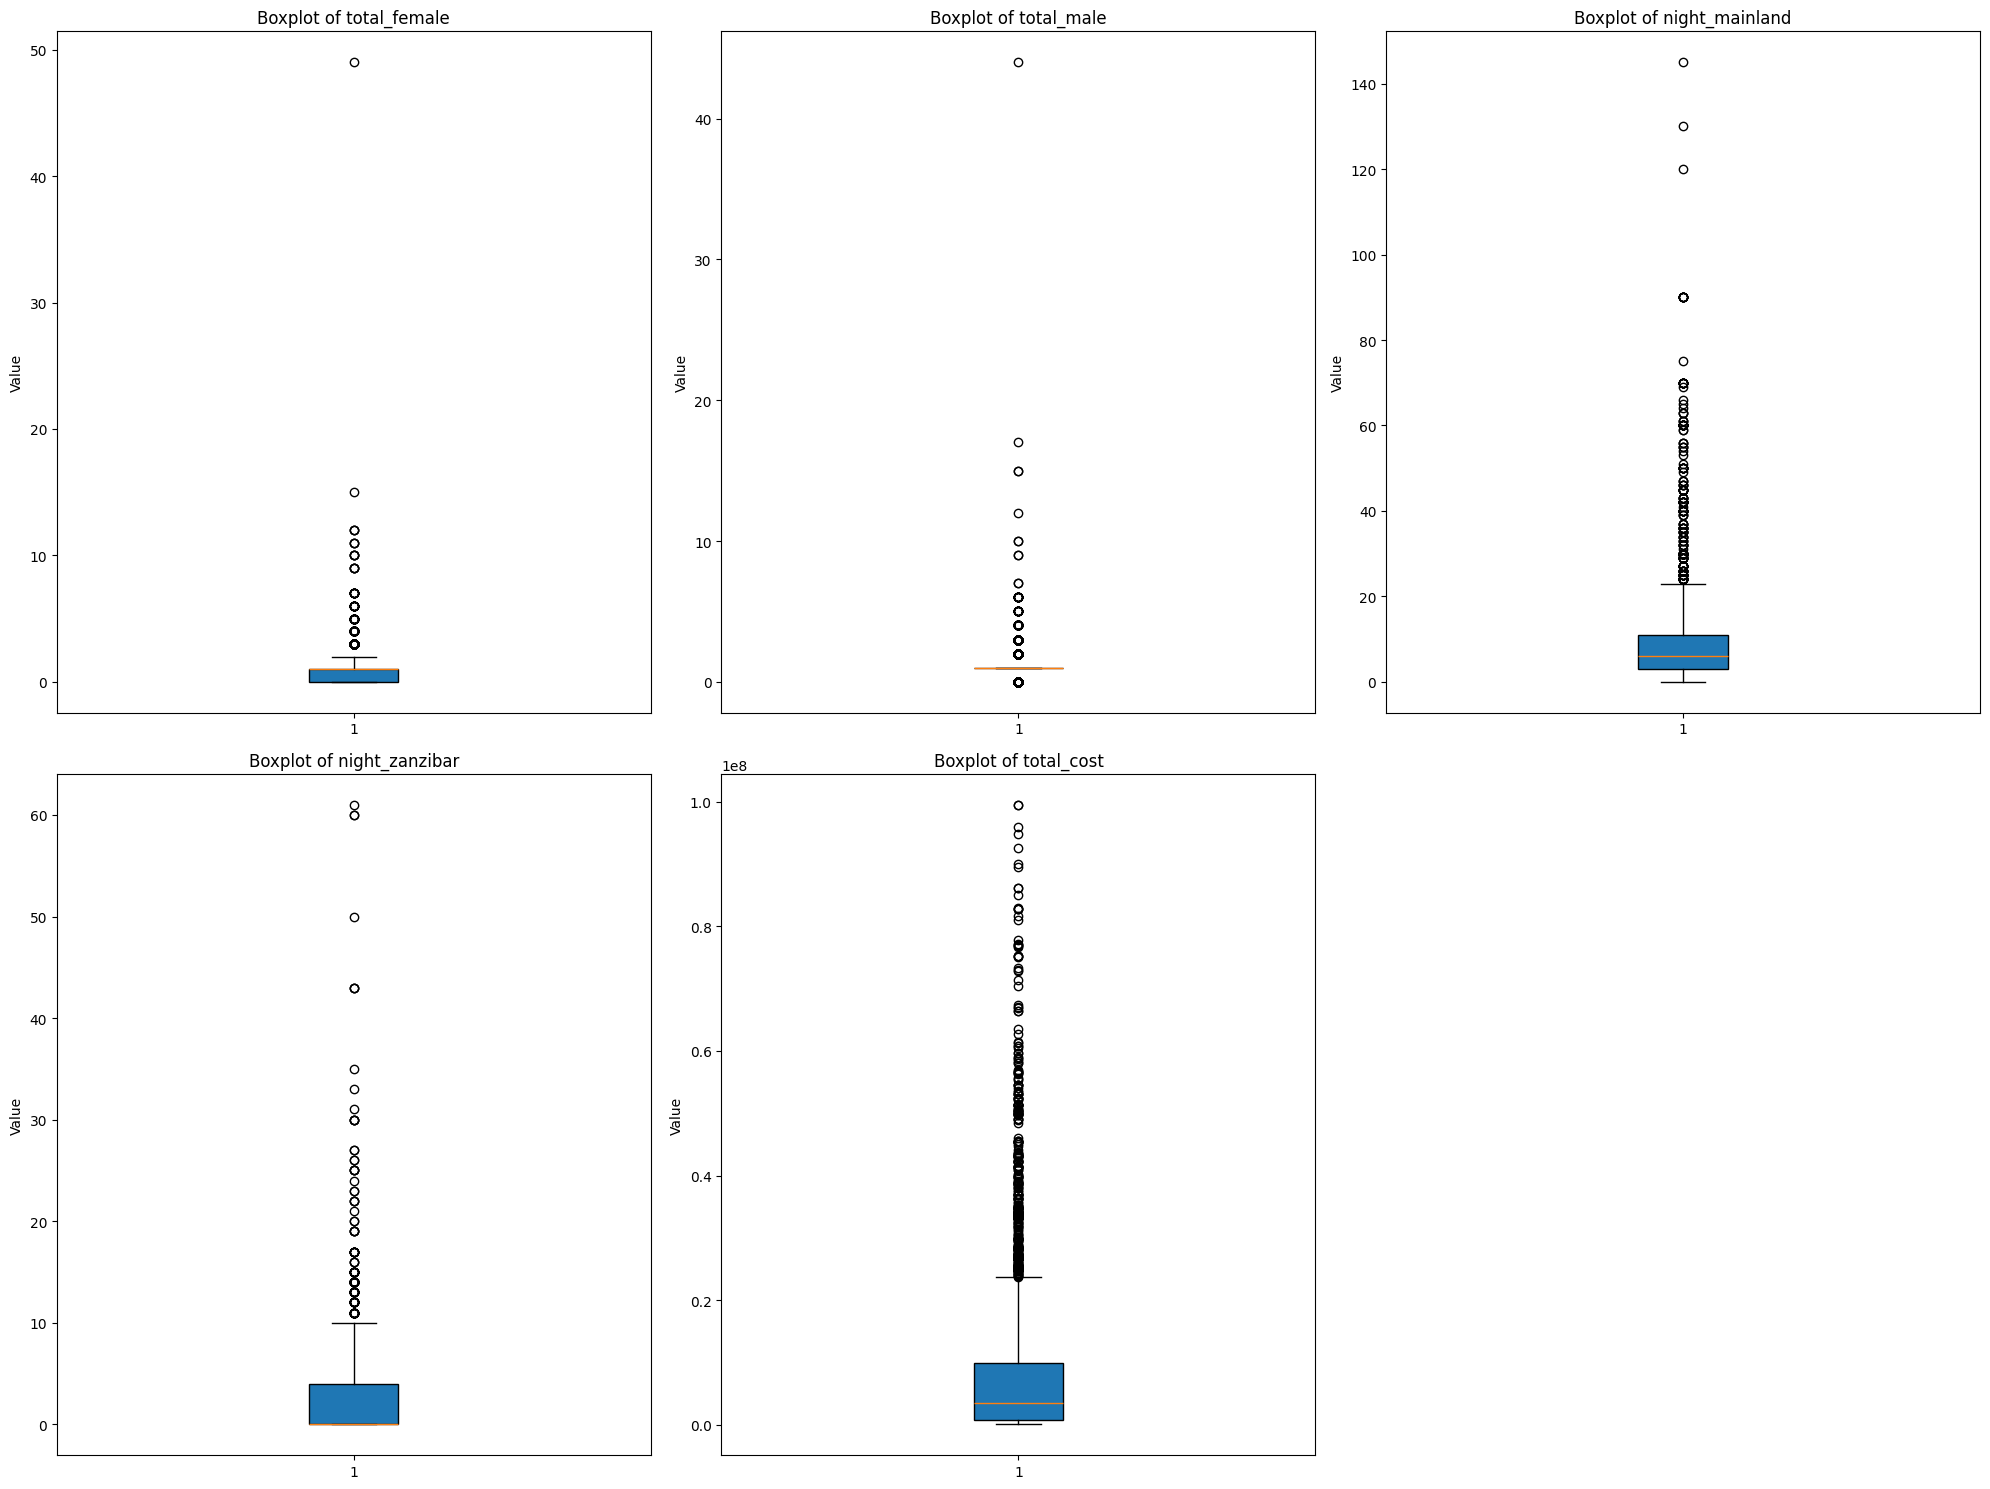

In [ ]:
plt.figure(figsize=(20,15))
for i, col in enumerate(numerical_columns.columns.tolist()):
  plt.subplot(2,3,i+1)
  plt.boxplot(train_df[col].dropna(), patch_artist=True)
  plt.ylabel("Value")
  plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

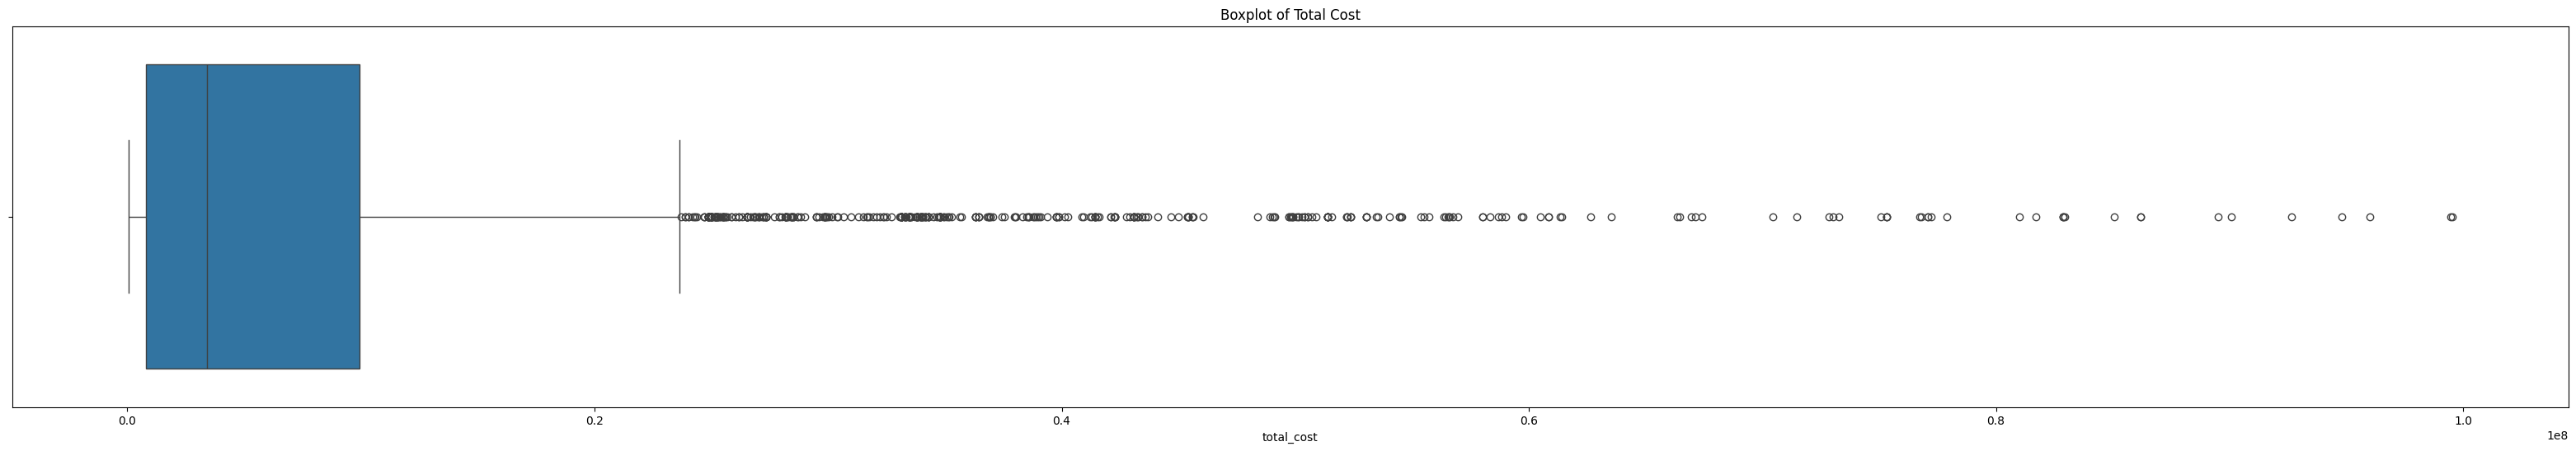

In [ ]:
# A closer look at our target variable
fig, ax = plt.subplots(figsize=(40, 6))
sns.boxplot(data=train_df, x='total_cost', ax=ax)
plt.title('Boxplot of Total Cost')
plt.show()

Our target variable, total_cost, shows right-skewness, with by a long tail of high-value outliers.

> Do we remove outliers?

No, These unusually high values in total_cost and related features aren't mistakes — they reflect real differences caused by economic factors. Some tourists may spend more because of higher income, longer stays, or employer-covered trips. It's important to keep this "raw" data because it holds useful information that helps make better predictions and tourism decisions. Changing or removing these values could lead to losing important insights.

####Histogram

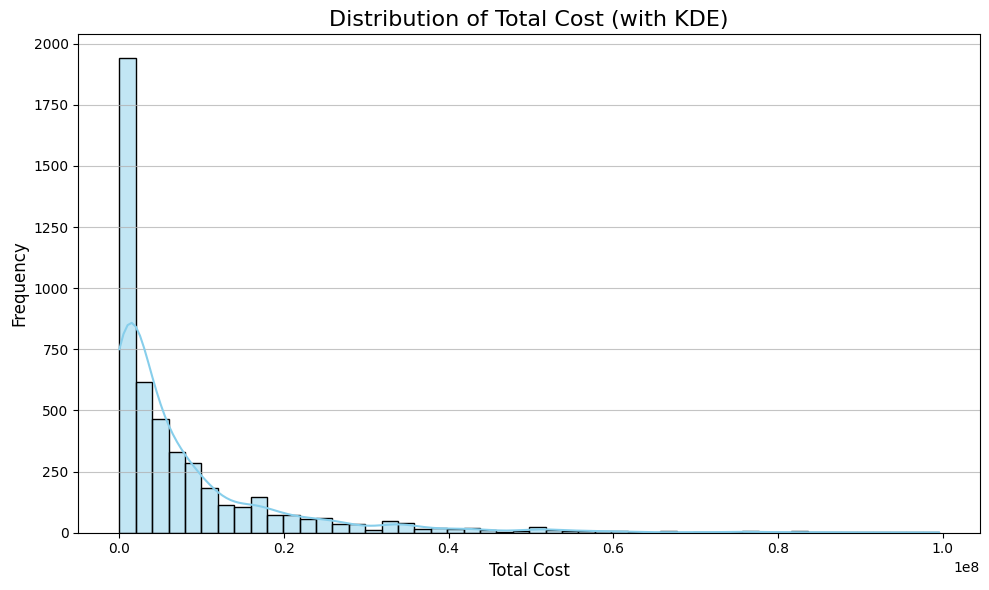

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['total_cost'], kde=True, bins=50, color='skyblue') # kde adds a density curve
plt.title('Distribution of Total Cost (with KDE)', fontsize=16)
plt.xlabel('Total Cost', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show() # times 10 to the power of 8

####Quantile-Normal Plot

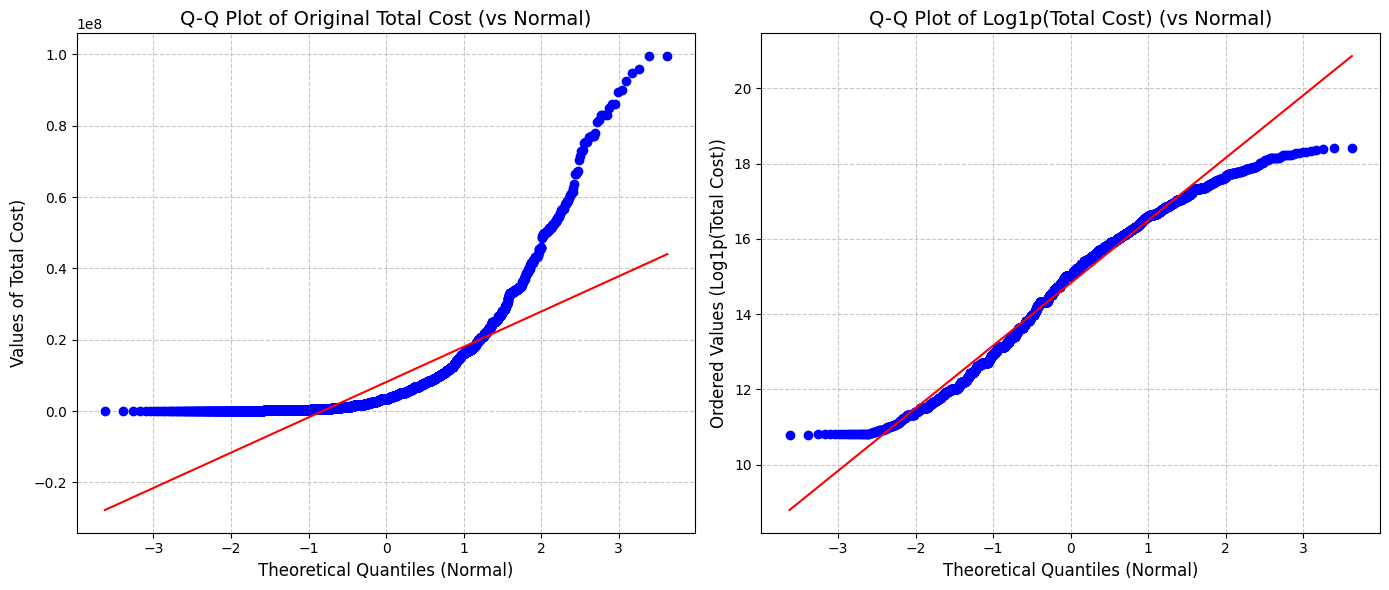

In [ ]:
plt.figure(figsize=(14, 6))

# Subplot 1: Original total_cost Q-Q Plot
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
stats.probplot(train_df['total_cost'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Original Total Cost (vs Normal)', fontsize=14)
plt.xlabel('Theoretical Quantiles (Normal)', fontsize=12)
plt.ylabel('Values of Total Cost)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Apply log1p transformation
# np.log1p(x) is equivalent to log(1+x). It's preferred over np.log(x)
# because it handles zero values gracefully, which is important for costs.
train_df['total_cost_log'] = np.log1p(train_df['total_cost'])

# # Subplot 2: Log-Transformed total_cost Q-Q Plot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
stats.probplot(train_df['total_cost_log'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log1p(Total Cost) (vs Normal)', fontsize=14)
plt.xlabel('Theoretical Quantiles (Normal)', fontsize=12)
plt.ylabel('Ordered Values (Log1p(Total Cost))', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

###Multivarient Graphical EDA

####Heat Map

<Axes: >

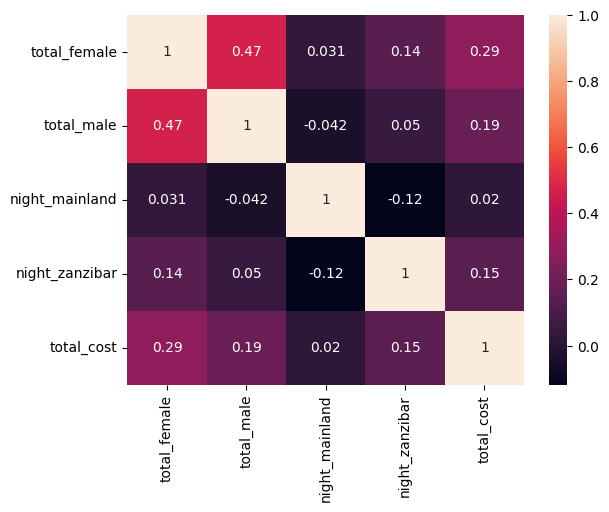

In [ ]:
heatmap_data = train_df[['total_female', 'total_male', 'night_mainland', 'night_zanzibar','total_cost']]
sns.heatmap(heatmap_data.corr(), annot=True)

####Bar graphs

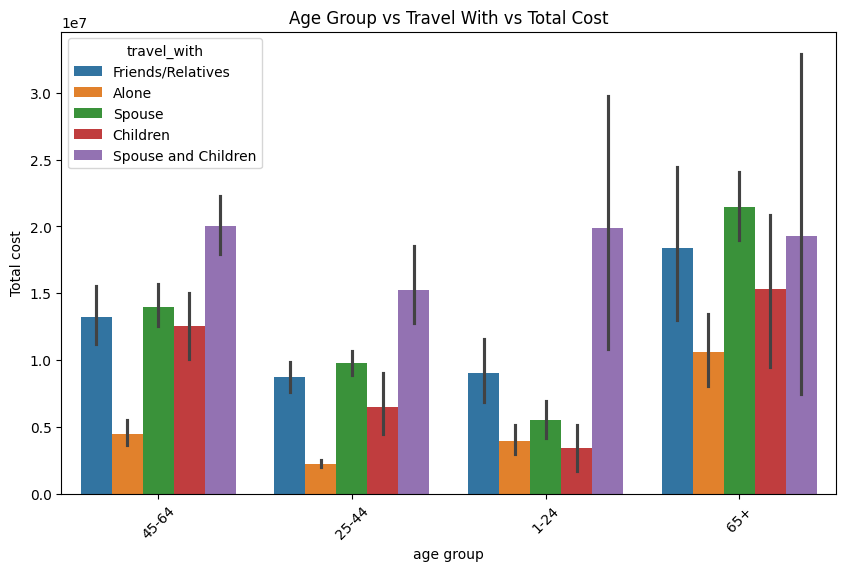

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='total_cost', hue='travel_with', data=train_df)
plt.xlabel('age group')
plt.ylabel('Total cost')
plt.title('Age Group vs Travel With vs Total Cost')
plt.xticks(rotation=45)
plt.show()

*Younger tourists (1-64) tend to spend more with spouse and children*

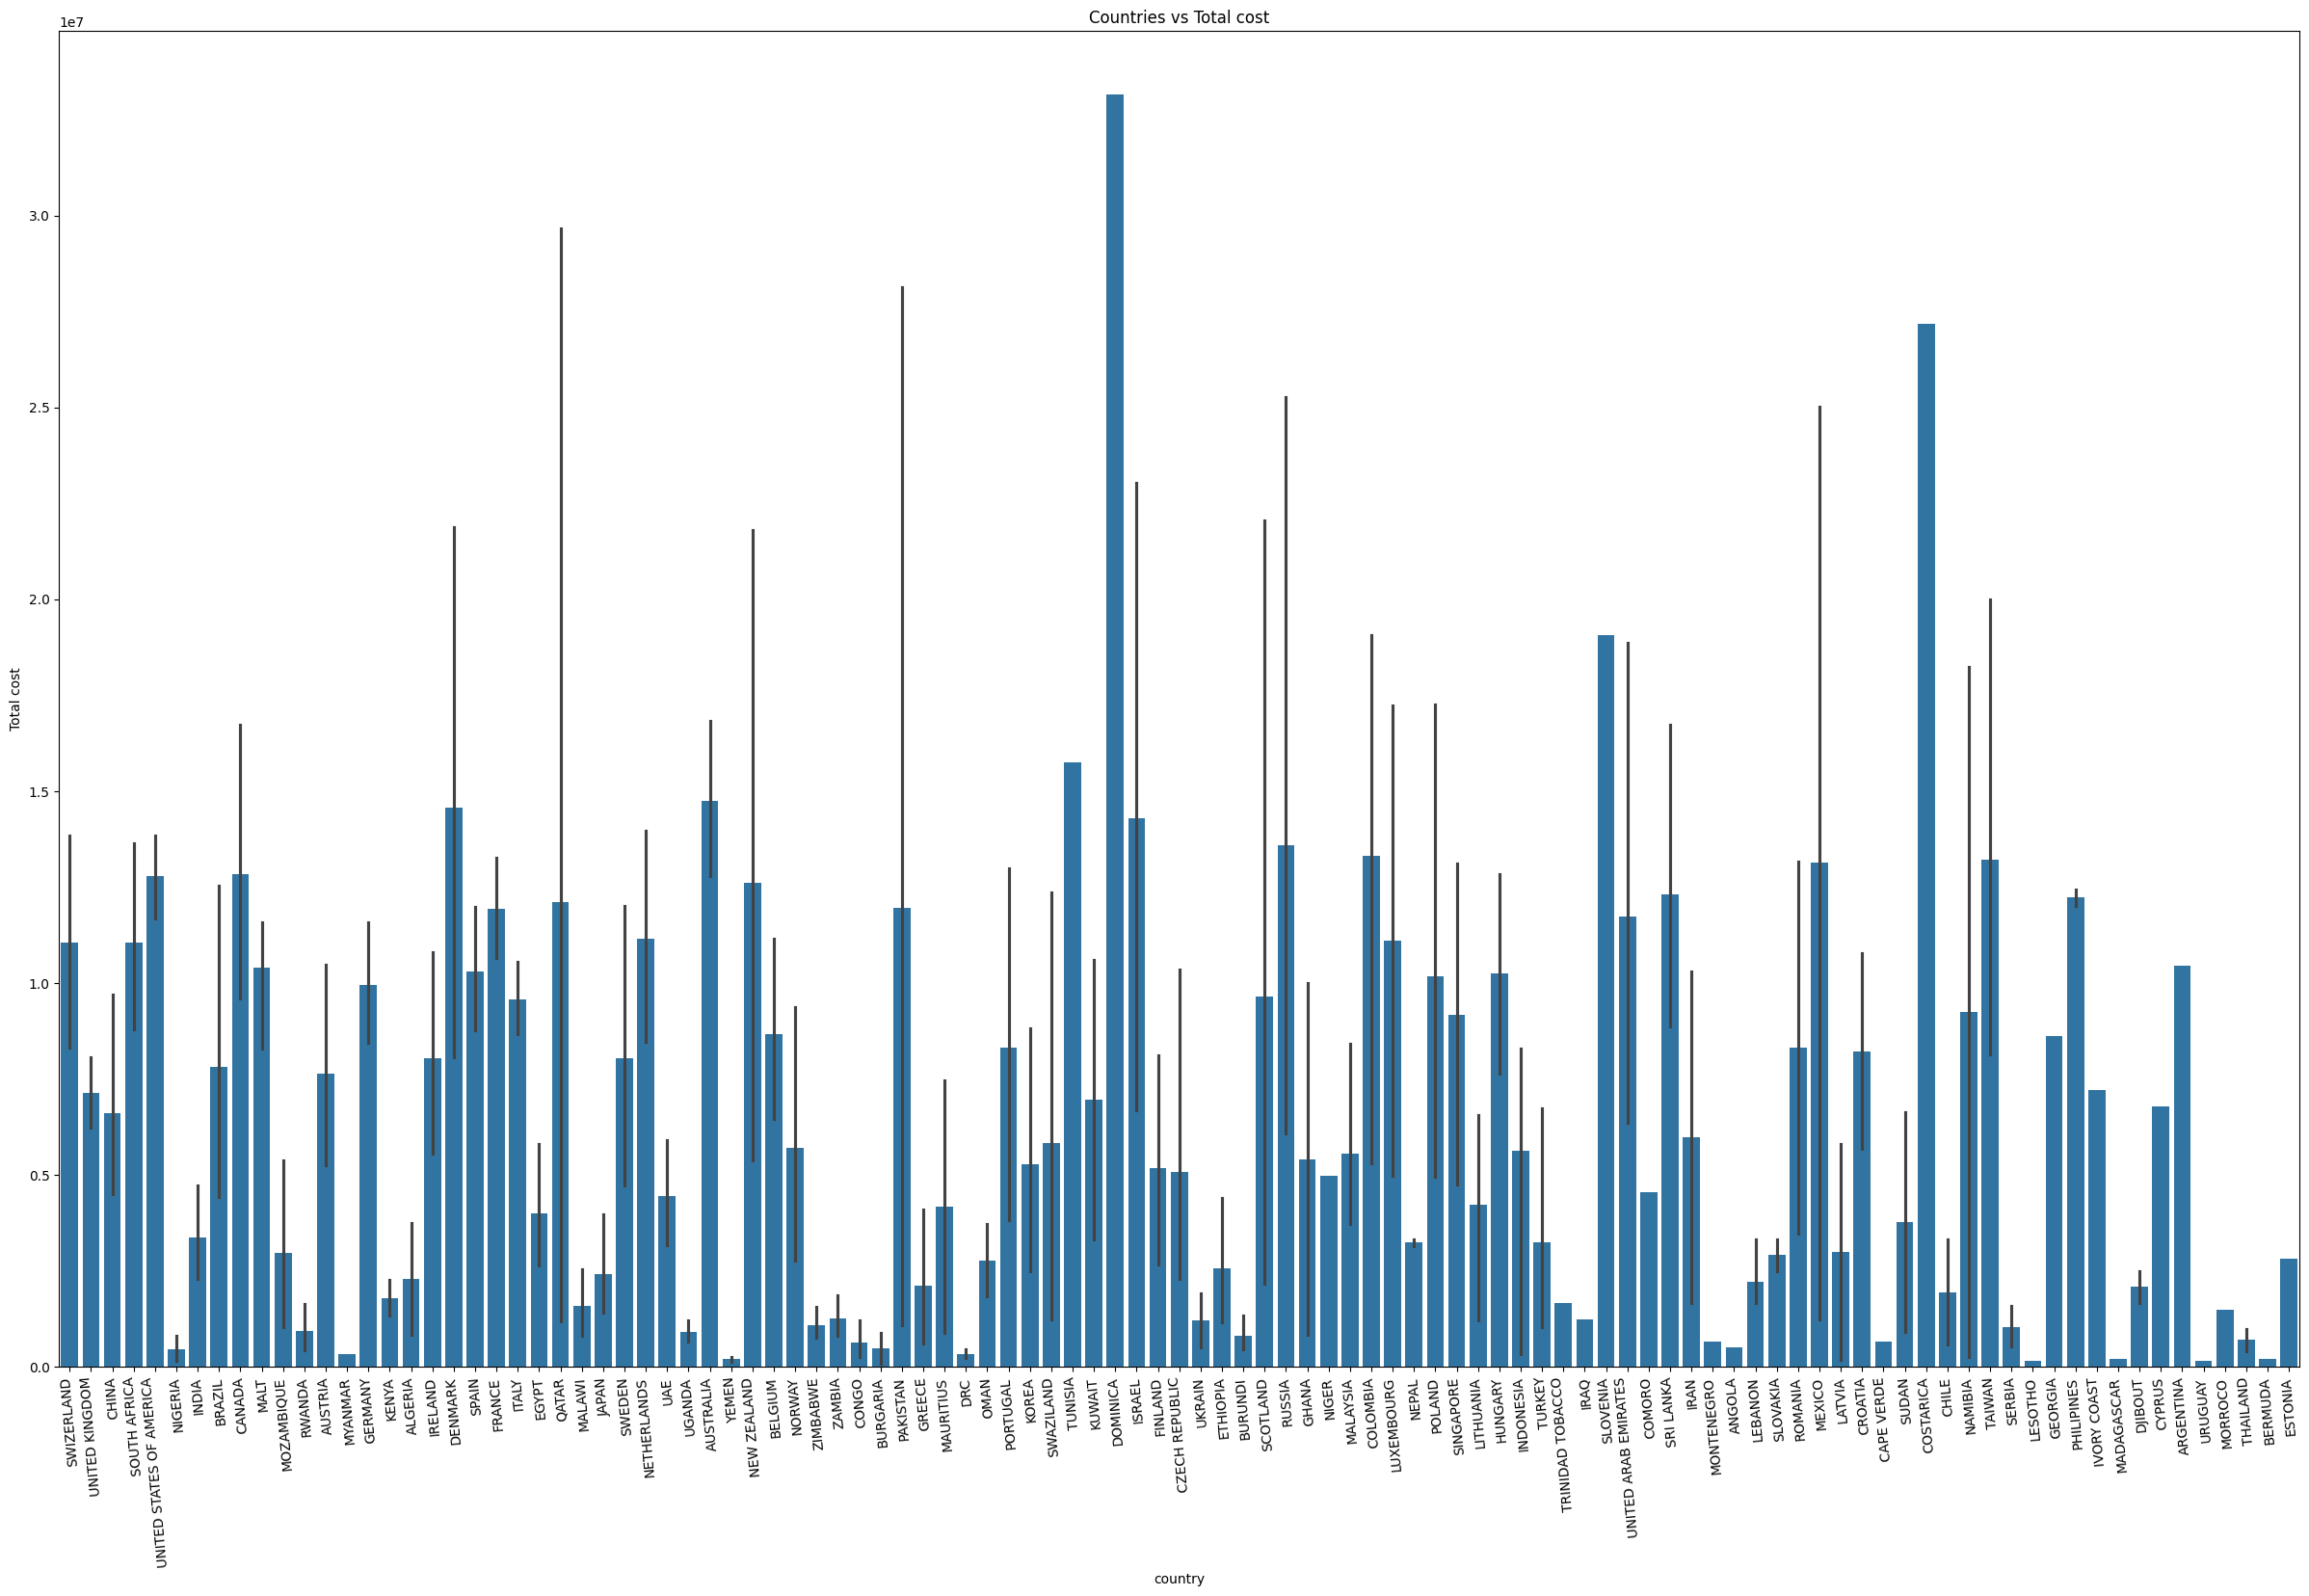

In [ ]:
plt.figure(figsize=(30, 18))
sns.barplot(x='country', y='total_cost', data=train_df)
plt.xlabel('country')
plt.ylabel('Total cost')
plt.title('Countries vs Total cost')
plt.xticks(rotation=95)
plt.show()

*Dominica Spends the most money*

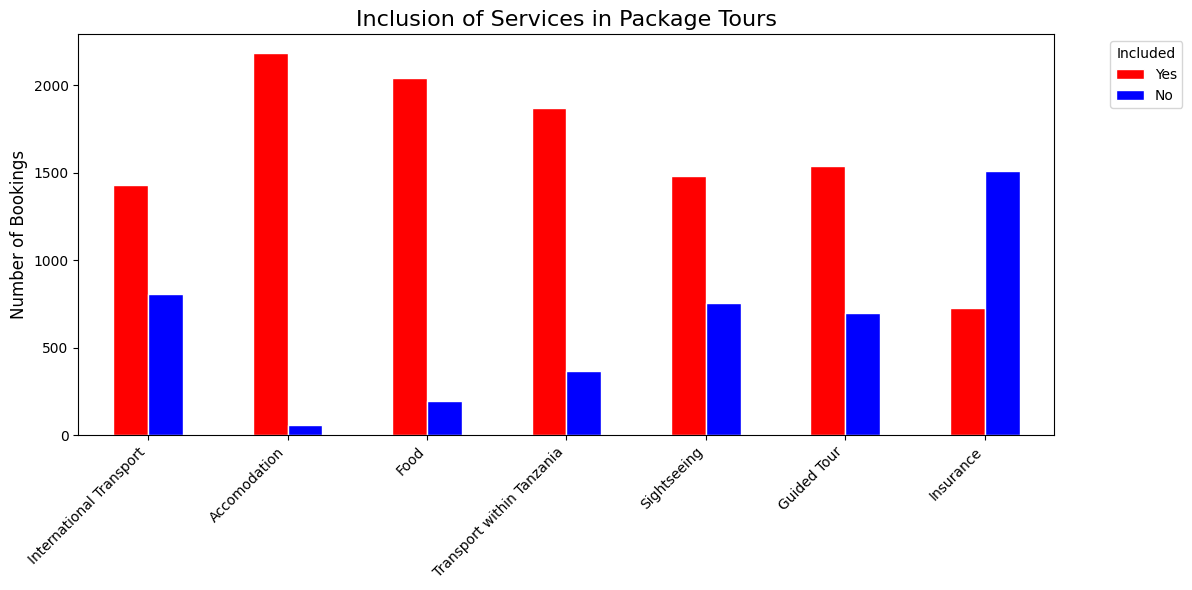

In [ ]:
tourarrangement = train_df[['tour_arrangement','package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance']].copy()

packages_tourarrangements = tourarrangement[(tourarrangement.tour_arrangement == 'Package Tour')]
packages_tourarrangements = packages_tourarrangements.drop(['tour_arrangement'], axis=1)
packages_tourarrangements_num = packages_tourarrangements.apply(pd.Series.value_counts)

for col in packages_tourarrangements_num.columns:
    if 'Yes' not in packages_tourarrangements_num.index:
        packages_tourarrangements_num.loc['Yes', col] = 0
    if 'No' not in packages_tourarrangements_num.index:
        packages_tourarrangements_num.loc['No', col] = 0
packages_tourarrangements_num = packages_tourarrangements_num.loc[['Yes', 'No']]

ax = packages_tourarrangements_num.T.plot.bar(
    color = {'Yes': "red", 'No':'blue'},
    edgecolor='White',
    figsize=(12, 6)
)

ax.set_xticklabels([
    'International Transport', 'Accomodation', 'Food',
    'Transport within Tanzania', 'Sightseeing', 'Guided Tour', 'Insurance'
], rotation=45, ha="right")

ax.set_title('Inclusion of Services in Package Tours', fontsize=16)
ax.set_ylabel('Number of Bookings', fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(title='Included', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

*Accommodation and Food are the most frequently included services in package tours*

####Scatter Plots

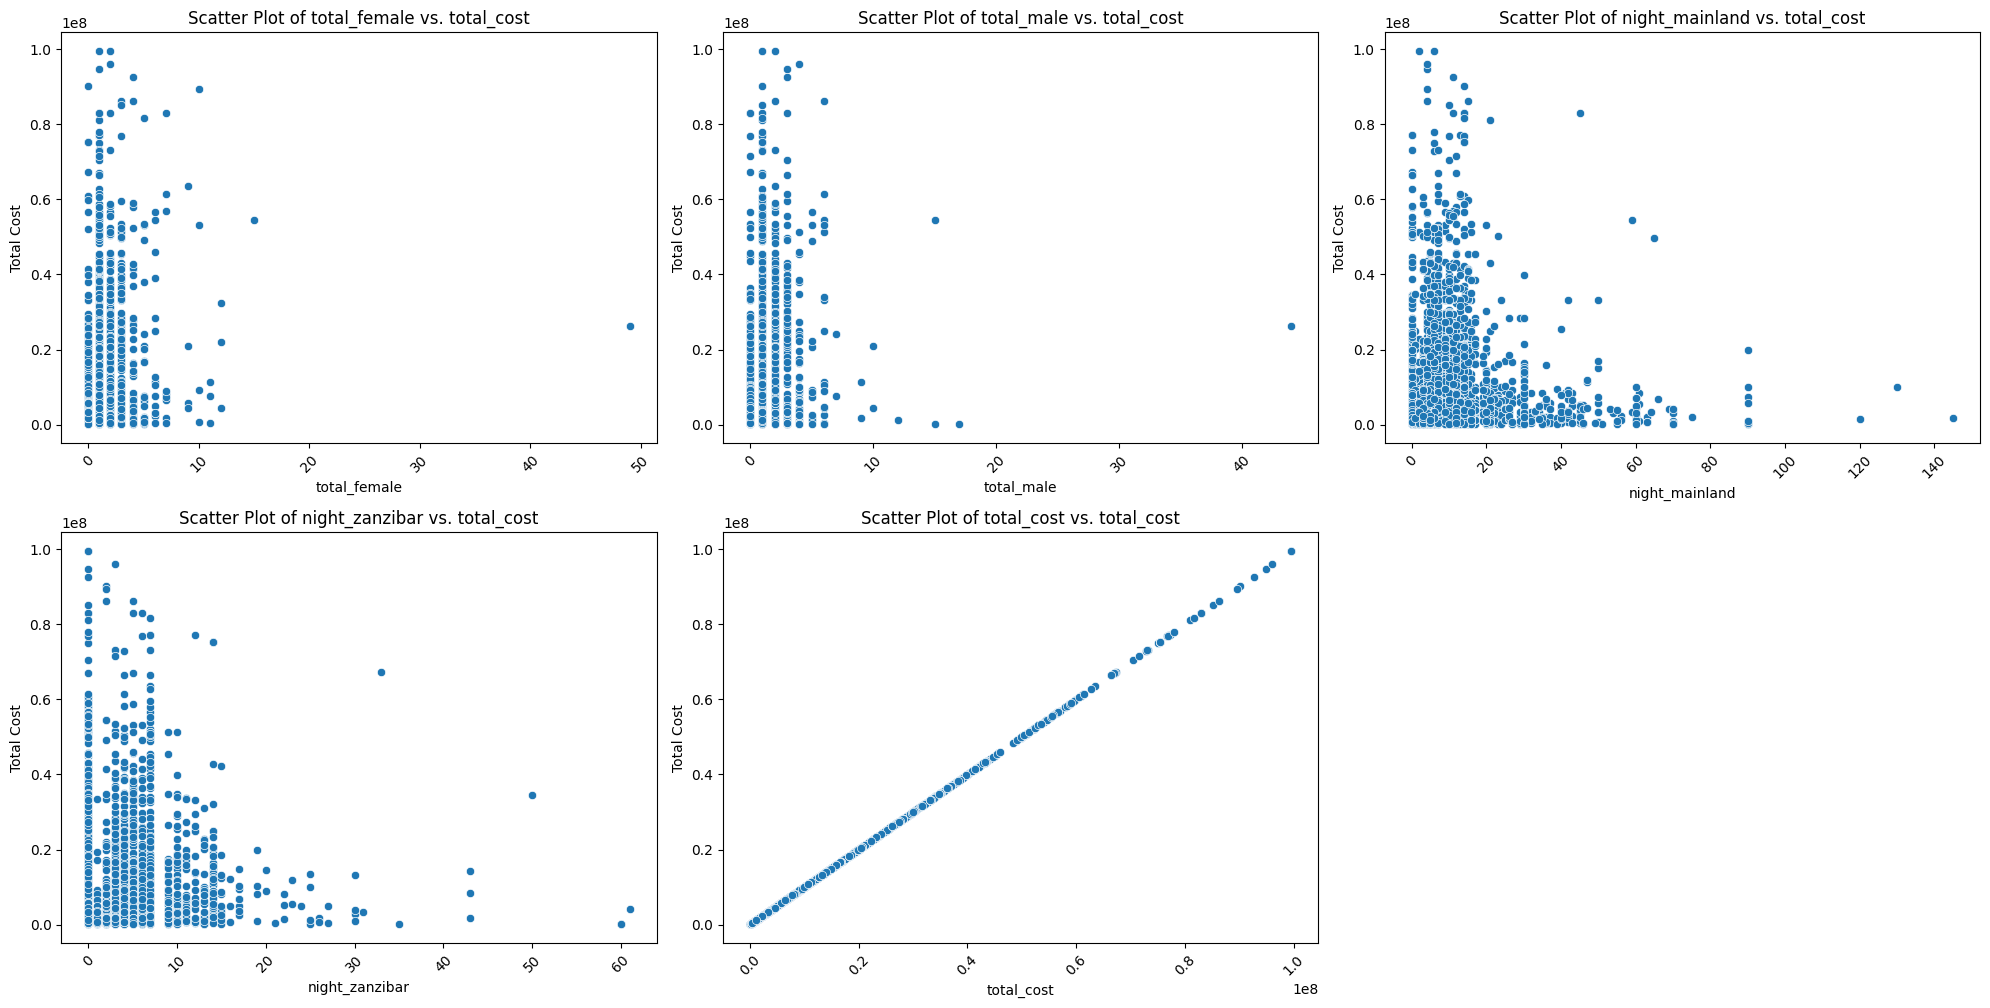

In [ ]:
num_plots = len(numerical_columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

plt.figure(figsize=(20, 5 * num_rows))  # Adjust size based on number of rows

for i, var in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=train_df, x=var, y='total_cost')
    plt.title(f'Scatter Plot of {var} vs. total_cost')
    plt.xlabel(var)
    plt.ylabel('Total Cost')
    plt.xticks(rotation=45)

plt.tight_layout()  # Helps avoid overlapping
plt.show()

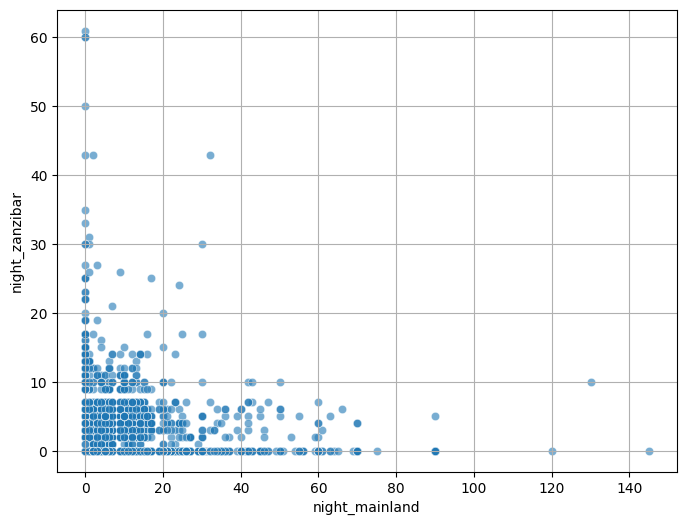

In [ ]:
df_scatter = train_df[['night_zanzibar', 'night_mainland']]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scatter, x='night_mainland', y='night_zanzibar', alpha=0.6)
plt.xlabel('night_mainland')
plt.ylabel('night_zanzibar')
plt.grid(True)
plt.show()

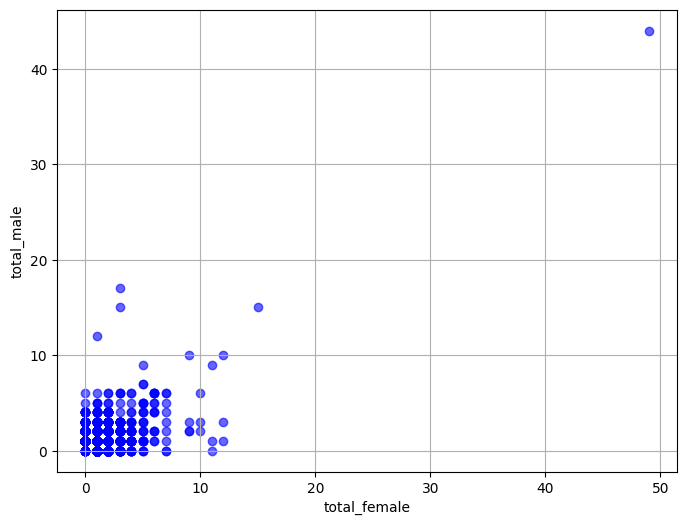

In [ ]:
x = train_df['total_female']
y = train_df['total_male']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.6)
plt.xlabel('total_female')
plt.ylabel('total_male')
plt.grid(True)
plt.show()

*no clear relationship between them*

#**Data Cleaning**

##**Detect and address nulls and NaNs**


###*Train Data*

####Check for Missing Values

In [ ]:
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100
missing_percentage

,0
ID,0.000000
country,0.000000
age_group,0.000000
travel_with,23.164899
total_female,0.062383
total_male,0.103972
purpose,0.000000
main_activity,0.000000
info_source,0.000000
tour_arrangement,0.000000


####Handle Missing Data

In [ ]:
# since total_cost is our target variable, missing 'total_cost' cannot be used for training
numerical_columns_wo_target = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('total_cost', errors='ignore')

# Fill missing values
train_df[categorical_columns] = train_df[categorical_columns].fillna(train_df[categorical_columns].mode().iloc[0])
train_df[numerical_columns_wo_target] = train_df[numerical_columns_wo_target].fillna(train_df[numerical_columns_wo_target].median())

In [ ]:
missing_values = train_df.isnull().sum()
print("Missing values per column:\n", missing_values)
train_df.describe()

Missing values per column:
 ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
total_cost_log           0
dtype: int64


,total_female,total_male,night_mainland,night_zanzibar,total_cost,total_cost_log
count,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03,4809.000000
mean,0.926804,1.009565,8.488043,2.304429,8.114389e+06,14.826733
std,1.287841,1.138273,10.427624,4.227080,1.222490e+07,1.681619
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04,10.799596
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05,13.607472
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06,15.038661
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06,16.112581
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07,18.415999


####Verify

In [ ]:
train_df.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


###*Test Data*

####Check for Missing Values

In [ ]:
missing_percentage = (test_df.isnull().sum() / len(test_df)) * 100
missing_percentage

,0
ID,0.000000
country,0.000000
age_group,0.000000
travel_with,20.424735
total_female,0.062461
total_male,0.124922
purpose,0.000000
main_activity,0.000000
info_source,0.000000
tour_arrangement,0.000000


####Handle Missing Data in test dataframe

In [ ]:
# use the mode and median calculated from train_df
# using values from the test data would leak information from the test set into your training process and this could cause overfitting and lead to overly optimistic model performance

In [ ]:
categorical_columns_test = test_df.select_dtypes(include="object").columns.tolist()
numerical_columns_test = test_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Fill categorical columns in test using mode from train
for col in categorical_columns_test:
    test_df[col] = test_df[col].fillna(train_df[col].mode().iloc[0])

# Fill numerical columns in test using median from train
for col in numerical_columns_test:
    test_df[col] = test_df[col].fillna(train_df[col].median())

####Verify

In [ ]:
test_df.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


##**Detect and address outliers**


###*Train Data*

#### Detecting Outliers Using the IQR Method

In [ ]:
# since total_cost is our target variable, can not get rid of outliers
for col in numerical_columns_wo_target:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    print(f"Count of outliers in {col}: {outliers.shape[0]}")

Count of outliers in total_female: 256
Count of outliers in total_male: 1843
Count of outliers in night_mainland: 274
Count of outliers in night_zanzibar: 186
Count of outliers in total_cost_log: 0


####Handling Outliers

In [ ]:
# Make a copy of the cleaned data before handling outliers
outlier_capped_df = train_df.copy()

# Apply IQR capping for each numerical column
for col in numerical_columns_wo_target:
    Q1 = outlier_capped_df[col].quantile(0.25)
    Q3 = outlier_capped_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values
    outlier_capped_df[col] = np.where(outlier_capped_df[col] < lower_bound, lower_bound, outlier_capped_df[col])
    outlier_capped_df[col] = np.where(outlier_capped_df[col] > upper_bound, upper_bound, outlier_capped_df[col])

####Verifying

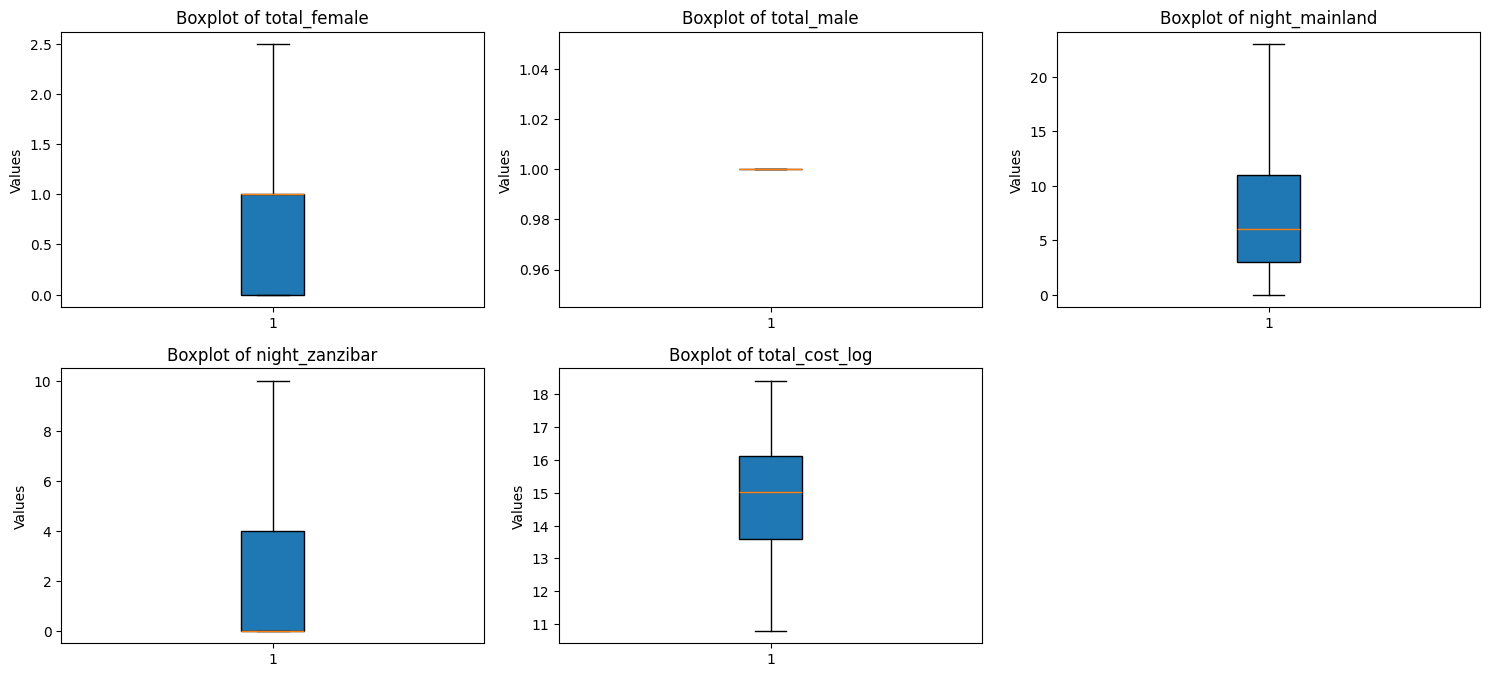

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns_wo_target):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(outlier_capped_df[col].dropna(), patch_artist=True)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

###*Test Data*

#### Detecting Outliers Using the IQR Method

In [ ]:
for col in numerical_columns_test:
    Q1 = test_df[col].quantile(0.25)
    Q3 = test_df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)]
    print(f"Count of outliers in {col}: {outliers.shape[0]}")

Count of outliers in total_female: 80
Count of outliers in total_male: 593
Count of outliers in night_mainland: 106
Count of outliers in night_zanzibar: 76


####Handling Outliers

In [ ]:
# Make a copy of the test data before handling outliers
outlier_capped_test_df = test_df.copy()

# Apply IQR capping for each numerical column in test set
for col in numerical_columns_test:
    Q1 = outlier_capped_test_df[col].quantile(0.25)
    Q3 = outlier_capped_test_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values
    outlier_capped_test_df[col] = np.where(outlier_capped_test_df[col] < lower_bound, lower_bound, outlier_capped_test_df[col])
    outlier_capped_test_df[col] = np.where(outlier_capped_test_df[col] > upper_bound, upper_bound, outlier_capped_test_df[col])

####Verifying

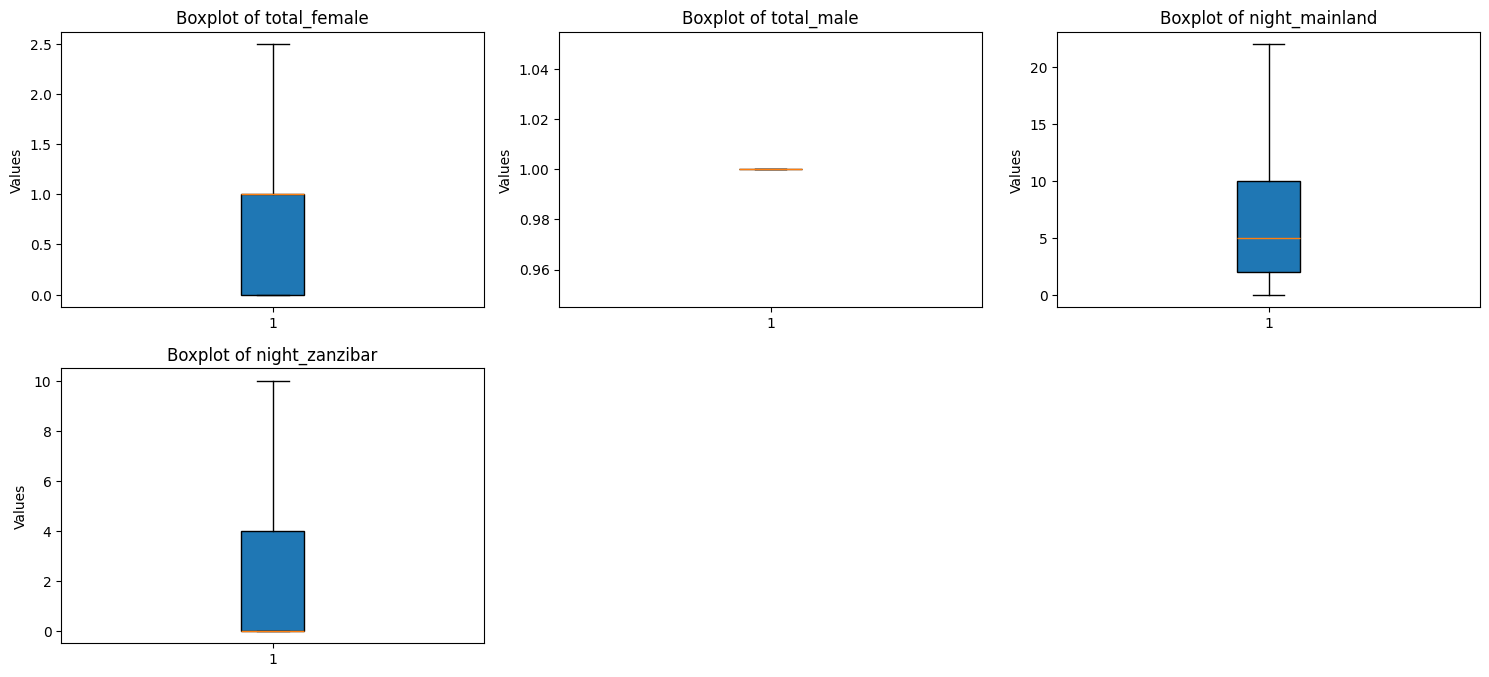

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns_test):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(outlier_capped_test_df[col].dropna(), patch_artist=True)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

#**Data Transformation**

##Power transformations

###Yeo johnson on Train Data

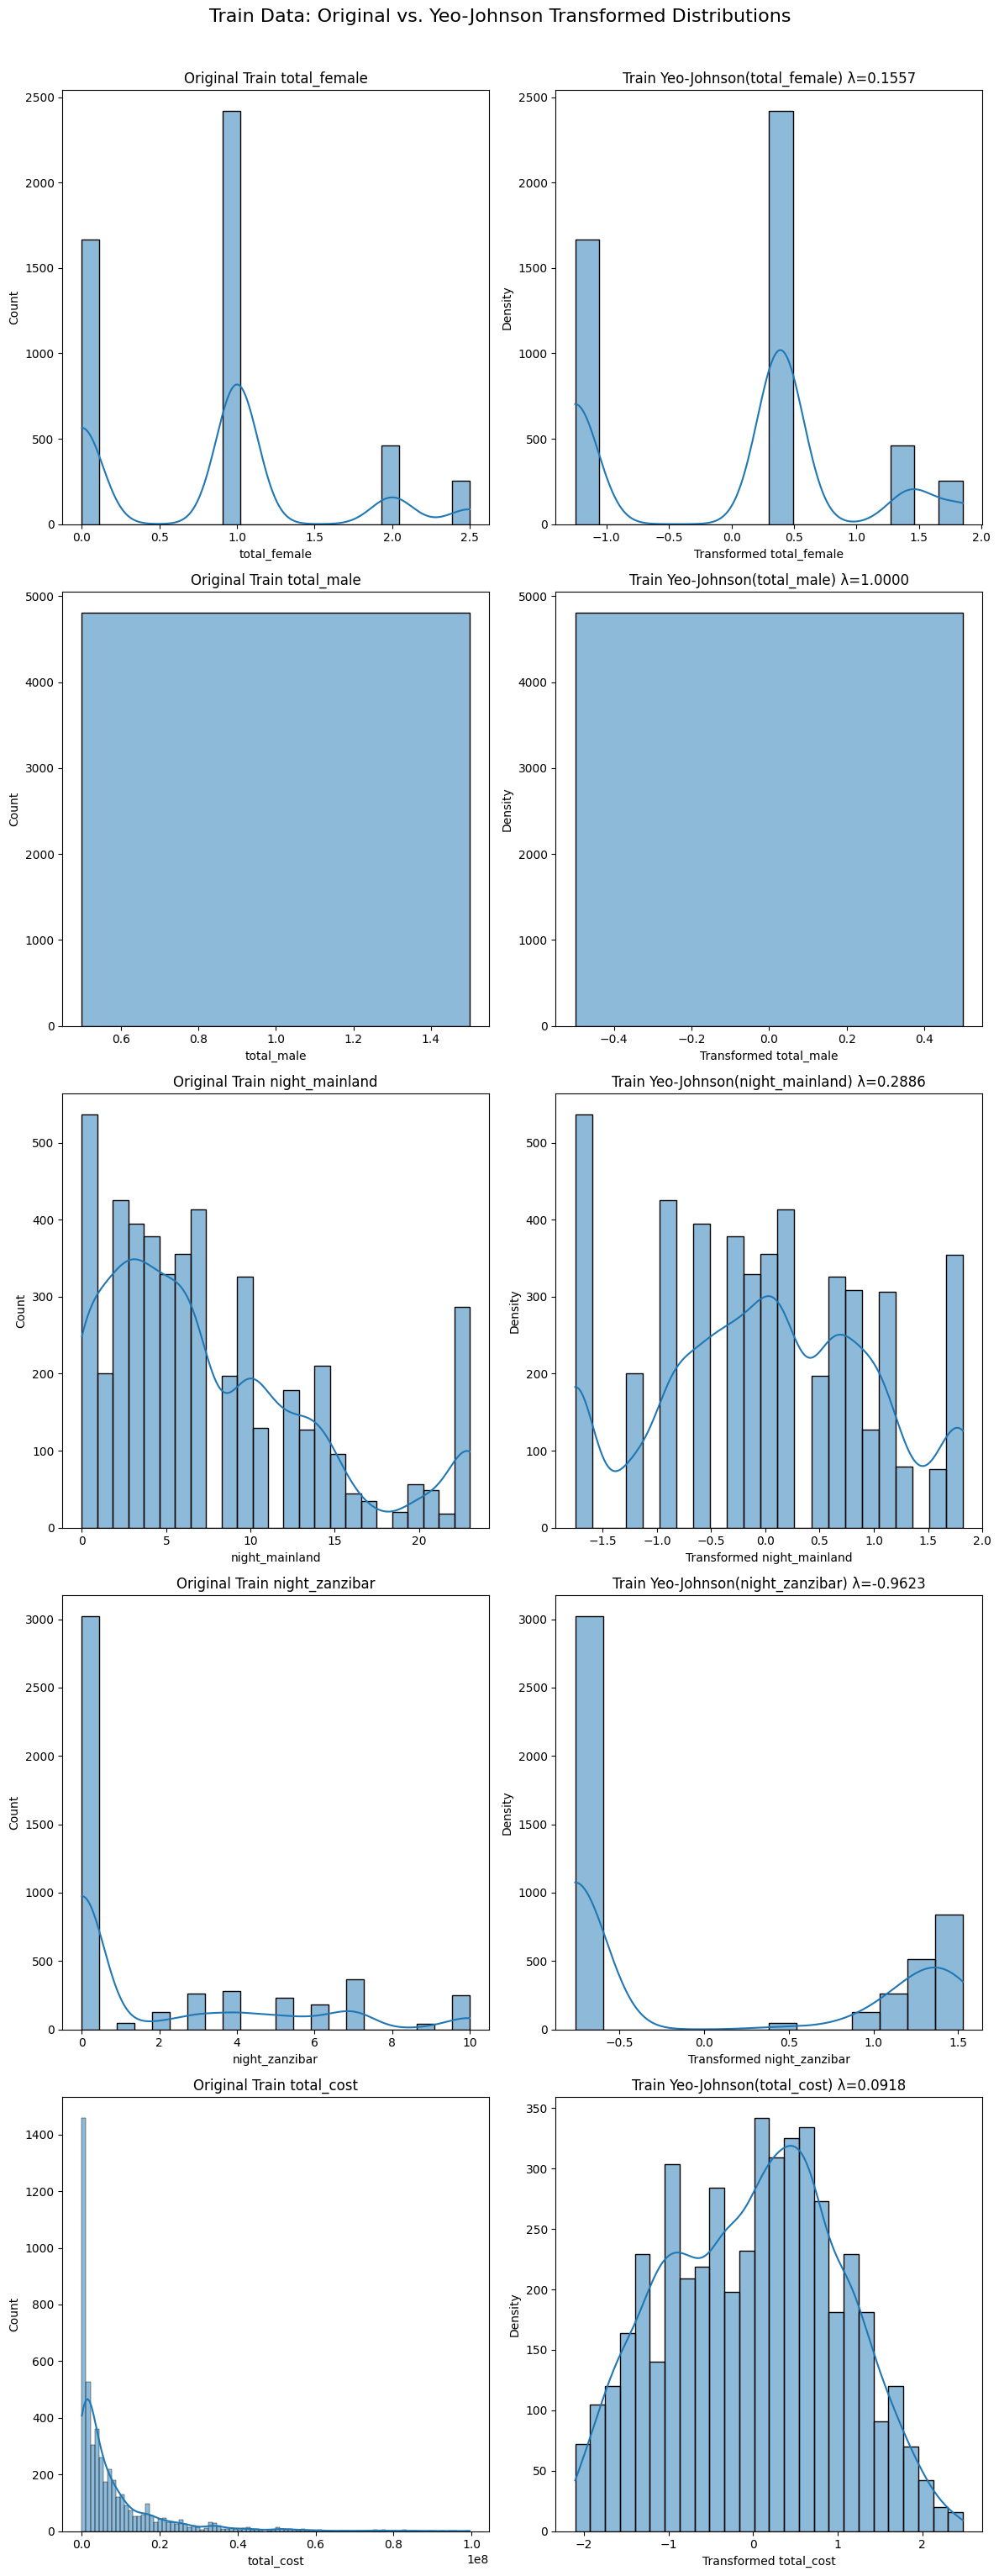


--- Summary Statistics: Train Data Yeo-Johnson Transformations ---

Feature: total_female
Original:
count    4809.000000
mean        0.829070
std         0.730756
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.500000
Name: total_female, dtype: float64
Yeo-Johnson (λ=0.1557):
count    4.809000e+03
mean    -8.274151e-17
std      1.000104e+00
min     -1.249660e+00
25%     -1.249660e+00
50%      3.910827e-01
75%      3.910827e-01
max      1.851189e+00
Name: total_female, dtype: float64

Feature: total_male
Original:
count    4809.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: total_male, dtype: float64
Yeo-Johnson (λ=1.0000):
count    4809.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: total_male, dtype: float64

Feature: night_mainland
Original:
count    4809.000000
mean        7.464546
std    

In [ ]:
features_to_transform_train = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']

fitted_power_transformers = {}
train_yeojohnson_df = pd.DataFrame()  # DataFrame to hold transformed train data

# Set up plots for outlier_capped_df (instead of train_df)
fig_train, axes_train = plt.subplots(len(features_to_transform_train), 2, figsize=(12, 6 * len(features_to_transform_train)))

for i, feature in enumerate(features_to_transform_train):
    original_train = outlier_capped_df[feature]  # CHANGED from train_df to outlier_capped_df

    pt = PowerTransformer(method='yeo-johnson', standardize=True)

    reshaped_data_train = original_train.values.reshape(-1, 1)
    yeojohnson_transformed_train = pt.fit_transform(reshaped_data_train).flatten()
    lambda_opt_train = pt.lambdas_[0]

    fitted_power_transformers[feature] = pt
    train_yeojohnson_df[feature] = yeojohnson_transformed_train

    # Plot original
    sns.histplot(original_train, kde=True, ax=axes_train[i, 0])
    axes_train[i, 0].set_title(f'Original Train {feature}')
    axes_train[i, 0].set_xlabel(feature)
    axes_train[i, 0].set_ylabel('Count')

    # Plot transformed
    sns.histplot(yeojohnson_transformed_train, kde=True, ax=axes_train[i, 1])
    axes_train[i, 1].set_title(f'Train Yeo-Johnson({feature}) λ={lambda_opt_train:.4f}')
    axes_train[i, 1].set_xlabel(f'Transformed {feature}')
    axes_train[i, 1].set_ylabel('Density')

plt.tight_layout()
plt.suptitle('Train Data: Original vs. Yeo-Johnson Transformed Distributions', y=1.02, fontsize=16)
plt.show()

# Summary Statistics for transformed train data
print("\n--- Summary Statistics: Train Data Yeo-Johnson Transformations ---")
for feature in features_to_transform_train:
    print(f"\nFeature: {feature}")
    print(f"Original:\n{outlier_capped_df[feature].describe()}")
    print(f"Yeo-Johnson (λ={fitted_power_transformers[feature].lambdas_[0]:.4f}):\n{train_yeojohnson_df[feature].describe()}")

print("\nFirst 5 rows of Yeo-Johnson transformed train_df features:")
print(train_yeojohnson_df.head())

###Yeo johnson Transformation on skewed Test Data

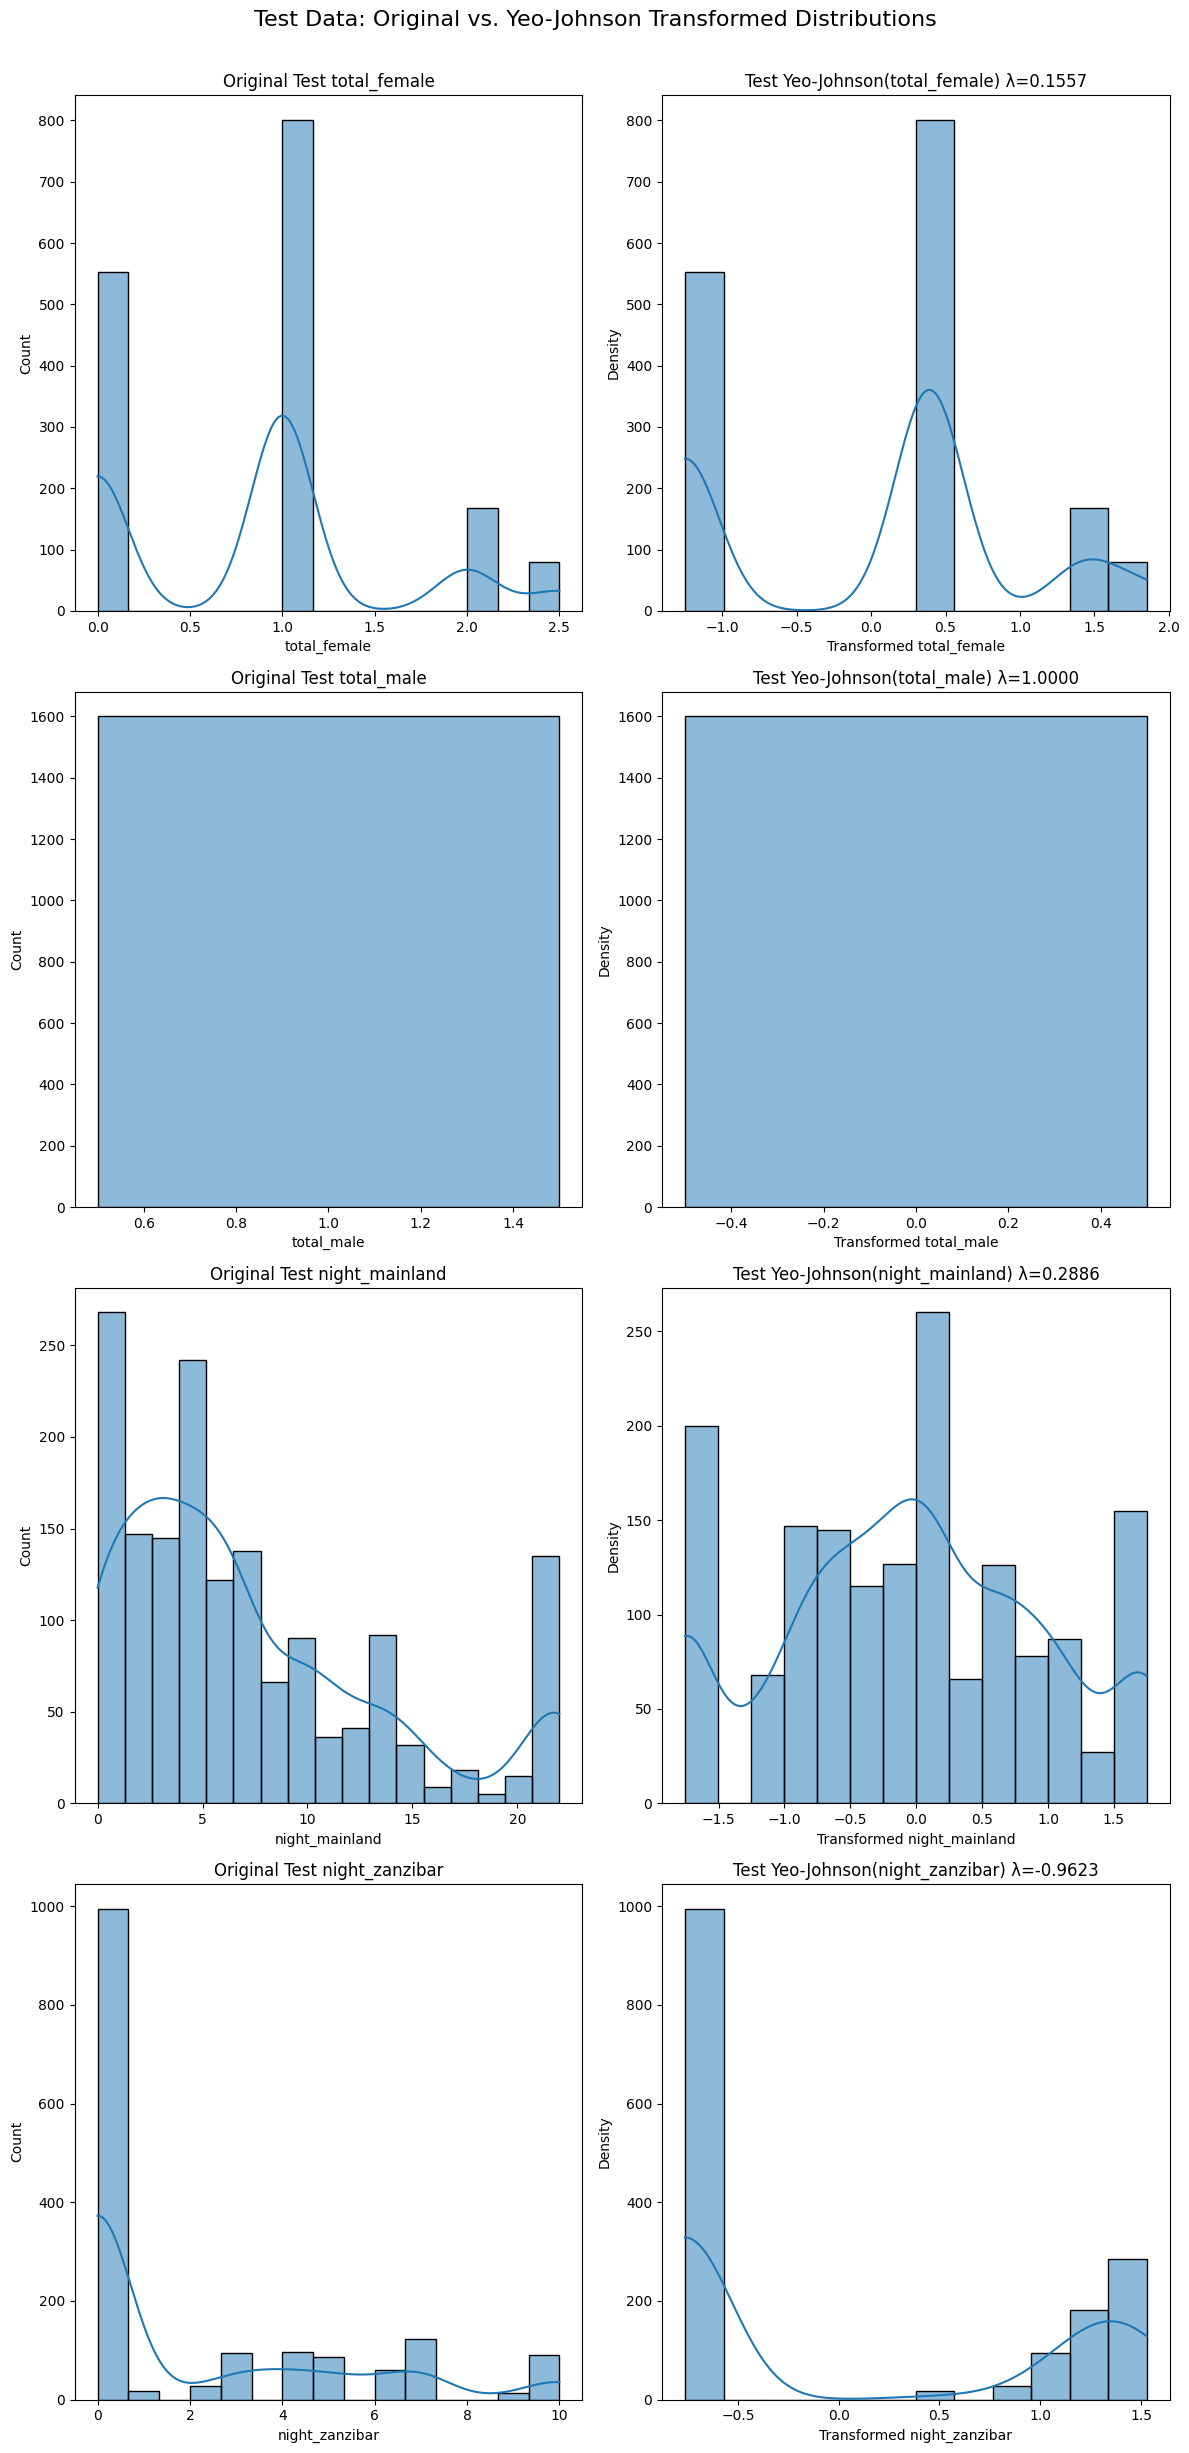


--- Summary Statistics: Test Data Yeo-Johnson Transformations ---

Feature: total_female
Original:
count    1601.000000
mean        0.835103
std         0.731637
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.500000
Name: total_female, dtype: float64
Yeo-Johnson (λ=0.1557):
count    1601.000000
mean        0.008010
std         1.001601
min        -1.249660
25%        -1.249660
50%         0.391083
75%         0.391083
max         1.851189
Name: total_female, dtype: float64

Feature: total_male
Original:
count    1601.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: total_male, dtype: float64
Yeo-Johnson (λ=1.0000):
count    1601.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: total_male, dtype: float64

Feature: night_mainland
Original:
count    1601.000000
mean        7.180512
std         6.33

In [ ]:
features_to_transform_test = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar']  # total_cost not in test set

test_yeojohnson_df = pd.DataFrame()

# Set up plots for outlier_capped_test_df
fig_test, axes_test = plt.subplots(len(features_to_transform_test), 2, figsize=(12, 6 * len(features_to_transform_test)))

for i, feature in enumerate(features_to_transform_test):
    original_test = outlier_capped_test_df[feature]  # CHANGED from test_df to outlier_capped_test_df

    # Use fitted transformer from training data
    pt_fitted = fitted_power_transformers[feature]

    reshaped_data_test = original_test.values.reshape(-1, 1)
    yeojohnson_transformed_test = pt_fitted.transform(reshaped_data_test).flatten()

    test_yeojohnson_df[feature] = yeojohnson_transformed_test

    # Plot original
    sns.histplot(original_test, kde=True, ax=axes_test[i, 0])
    axes_test[i, 0].set_title(f'Original Test {feature}')
    axes_test[i, 0].set_xlabel(feature)
    axes_test[i, 0].set_ylabel('Count')

    # Plot transformed
    sns.histplot(yeojohnson_transformed_test, kde=True, ax=axes_test[i, 1])
    axes_test[i, 1].set_title(f'Test Yeo-Johnson({feature}) λ={pt_fitted.lambdas_[0]:.4f}')
    axes_test[i, 1].set_xlabel(f'Transformed {feature}')
    axes_test[i, 1].set_ylabel('Density')

plt.tight_layout()
plt.suptitle('Test Data: Original vs. Yeo-Johnson Transformed Distributions', y=1.02, fontsize=16)
plt.show()

# Summary Statistics
print("\n--- Summary Statistics: Test Data Yeo-Johnson Transformations ---")
for feature in features_to_transform_test:
    print(f"\nFeature: {feature}")
    print(f"Original:\n{outlier_capped_test_df[feature].describe()}")  # CHANGED from test_df
    print(f"Yeo-Johnson (λ={fitted_power_transformers[feature].lambdas_[0]:.4f}):\n{pd.Series(test_yeojohnson_df[feature]).describe()}")

print("\nFirst 5 rows of Yeo-Johnson transformed test_df features:")
print(test_yeojohnson_df.head())


###Log and Box-Cox Transformation on target variable

In [ ]:
# original_cost = outlier_capped_df['total_cost']

# # Log Transformation
# log_cost = np.log(outlier_capped_df['total_cost'])

# # Box-Cox Transformation
# transformed_cost_boxcox, optimal_lambda_cost = stats.boxcox(outlier_capped_df['total_cost'])
# log_cost_df = pd.DataFrame({'log_total_cost': log_cost})
# boxcox_cost_df = pd.DataFrame({'boxcox_total_cost': transformed_cost_boxcox})

In [ ]:
# plt.figure(figsize=(18, 6))

# # Original Data
# plt.subplot(1, 3, 1)
# sns.histplot(original_cost, kde=True)
# plt.title('Original Total Cost')
# x_range = original_cost.max() - original_cost.min()
# x_min = original_cost.min() - 0.05 * x_range
# x_max = original_cost.max() + 0.05 * x_range
# plt.xlim(x_min, x_max)

# # Log Transformation
# plt.subplot(1, 3, 2)
# sns.histplot(log_cost, kde=True)
# plt.title('Log(Total Cost)')
# x_range = log_cost.max() - log_cost.min()
# x_min = log_cost.min() - 0.05 * x_range
# x_max = log_cost.max() + 0.05 * x_range
# plt.xlim(x_min, x_max)

# # Box-Cox Transformation
# plt.subplot(1, 3, 3)
# sns.histplot(transformed_cost_boxcox, kde=True)
# plt.title('Box-Cox(Total Cost)')
# x_range = transformed_cost_boxcox.max() - transformed_cost_boxcox.min()
# x_min = transformed_cost_boxcox.min() - 0.05 * x_range
# x_max = transformed_cost_boxcox.max() + 0.05 * x_range
# plt.xlim(x_min, x_max)

# plt.tight_layout()
# plt.show()

# # Summary Statistics

# print("\n--- Summary Statistics: Total Cost Transformations ---")
# print("\nOriginal Total Cost:\n", original_cost.describe())
# print("\nLog(Total Cost):\n", pd.Series(log_cost).describe())
# print(f"\nBox-Cox(Total Cost)  (Lambda = {optimal_lambda_cost:.4f}):\n", pd.Series(transformed_cost_boxcox).describe())

##Apply normalization or standardization to variables that require scaling

###Min-Max Normalization

In [ ]:
#scaler_minmax = MinMaxScaler()
#train_df_minmax = train_df.copy()
#train_df_minmax[number_columns] = scaler_minmax.fit_transform(train_df_minmax[number_columns])

In [ ]:
#print("\nOriginal Data:")
#print(train_df[number_columns].head())
#print("\nMin-Max Normalised Data:")
#train_df_minmax = pd.DataFrame(train_df_minmax, columns = train_df_minmax.columns)
#train_df_minmax[number_columns].head()

###Apply Z-score Normalization (already done in  yeo-johnson)

In [ ]:
scaler_standard = StandardScaler()
df_standard = train_yeojohnson_df.copy()
number_columns = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']
df_standard[number_columns] = scaler_standard.fit_transform(df_standard[number_columns])

number_columns = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']

print("\nOriginal Data:")
print(train_df[number_columns].head())

print("\nYeo-Johnson Transformed Data:")
print(train_yeojohnson_df[number_columns].head())

print("\nZ-score Normalised Yeo-Johnson Data:")
print(df_standard[number_columns].head())



Original Data:
   total_female  total_male  night_mainland  night_zanzibar  total_cost
0           1.0         1.0            13.0             0.0    674602.5
1           1.0         0.0            14.0             7.0   3214906.5
2           0.0         1.0             1.0            31.0   3315000.0
3           1.0         1.0            11.0             0.0   7790250.0
4           1.0         0.0             7.0             4.0   1657500.0

Yeo-Johnson Transformed Data:
   total_female  total_male  night_mainland  night_zanzibar  total_cost
0      0.391083         0.0        0.964054       -0.761694   -0.870768
1      0.391083         0.0        1.066613        1.437314    0.017774
2     -1.249660         0.0       -1.227336        1.528048    0.036527
3      0.391083         0.0        0.742153       -0.761694    0.580945
4      0.391083         0.0        0.203495        1.240715   -0.374820

Z-score Normalised Yeo-Johnson Data:
   total_female  total_male  night_mainland  night_

###Decimal Scaling Normalization

In [ ]:
#max_abs_val = np.max(np.abs(numerical_df.values),axis=0)
#df_decimal_scaled = numerical_df / 10 ** np.ceil(np.log10(max_abs_val))

In [ ]:
#print("\nOriginal Data:")
#print(train_df[number_columns].head())
#print("\nDecimal Scaled Normalised data:")
#df_decimal_scaled.head()

###Robust Scaling

In [ ]:
# Define the numerical columns — all your Yeo-Johnson transformed features
number_columns = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']

# Copy Yeo-Johnson data to avoid modifying the original
yeojohnson_robust_scaled = train_yeojohnson_df.copy()

# Initialize RobustScaler and apply it
scaler_robust = RobustScaler()
yeojohnson_robust_scaled[number_columns] = scaler_robust.fit_transform(yeojohnson_robust_scaled[number_columns])

# Print original Yeo-Johnson data
print("\nOriginal Yeo-Johnson Data (first 5 rows):")
print(train_yeojohnson_df[number_columns].head())

# Print Robust Scaled Yeo-Johnson data
print("\nRobust Scaled Yeo-Johnson Data (first 5 rows):")
print(yeojohnson_robust_scaled[number_columns].head())




Original Yeo-Johnson Data (first 5 rows):
   total_female  total_male  night_mainland  night_zanzibar  total_cost
0      0.391083         0.0        0.964054       -0.761694   -0.870768
1      0.391083         0.0        1.066613        1.437314    0.017774
2     -1.249660         0.0       -1.227336        1.528048    0.036527
3      0.391083         0.0        0.742153       -0.761694    0.580945
4      0.391083         0.0        0.203495        1.240715   -0.374820

Robust Scaled Yeo-Johnson Data (first 5 rows):
   total_female  total_male  night_mainland  night_zanzibar  total_cost
0           0.0         0.0        0.697609        0.000000   -0.608367
1           0.0         0.0        0.774989        1.098181   -0.022355
2          -1.0         0.0       -0.955793        1.143493   -0.009986
3           0.0         0.0        0.530185        0.000000    0.349069
4           0.0         0.0        0.123768        1.000000   -0.281279


###Visualizing Normalized & Standardized Data

####Plot Normalized (Min-Max) vs Original Data

In [ ]:
#plt.figure(figsize=(15, 15))
#for i, col in enumerate(number_columns):
    #plt.subplot(2, 3, i+1)
    #sns.histplot(numerical_columns[col], label="Original", kde=True, color='blue')
    #sns.histplot(train_df_minmax[col], label="Normalized (Min-Max)", kde=True, color='orange')
    #plt.title(f"Original vs. Normalized: {col}")
    #plt.legend()
#plt.tight_layout()
#plt.show()

####Plot Standardized (Z-score) vs Original Data

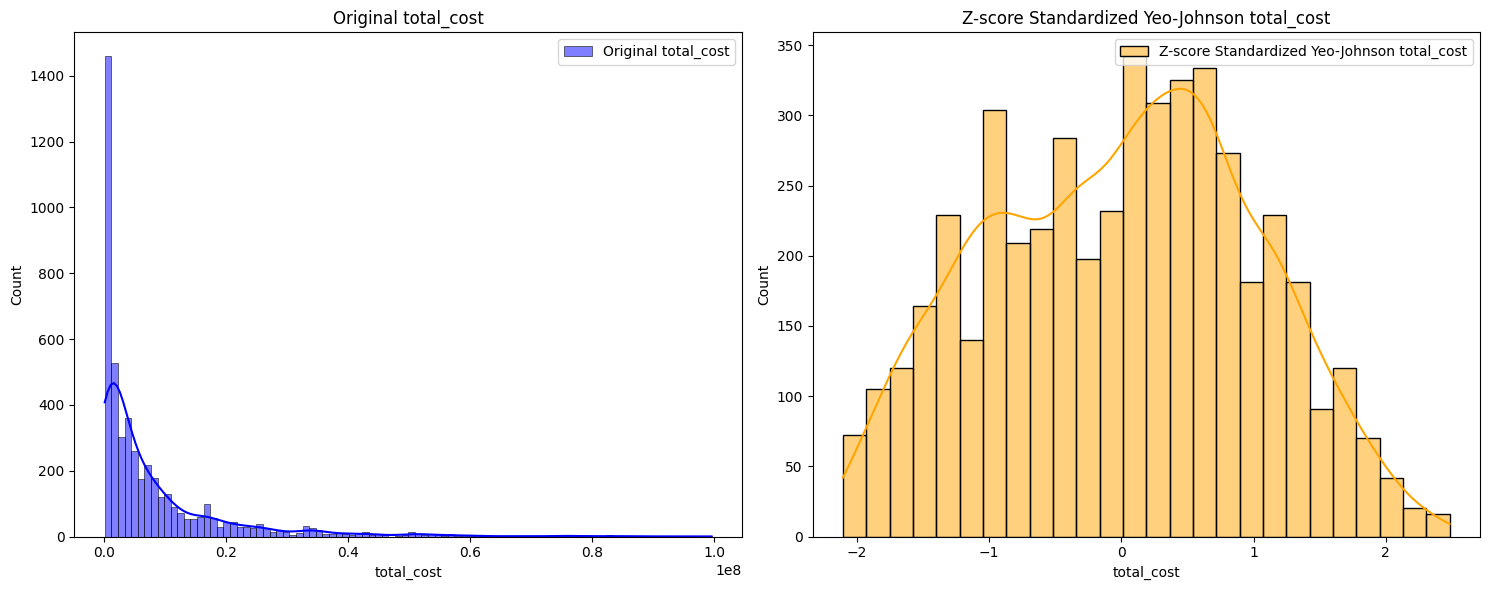

In [ ]:
plt.figure(figsize=(15, 6))

# Plot original total_cost from train_df (subplot 1)
plt.subplot(1, 2, 1)
sns.histplot(train_df['total_cost'], label="Original total_cost", kde=True, color='blue', alpha=0.5)
plt.title("Original total_cost")
plt.legend()

# Plot Z-score standardized Yeo-Johnson total_cost from df_standard (subplot 2)
plt.subplot(1, 2, 2)
sns.histplot(df_standard['total_cost'], label="Z-score Standardized Yeo-Johnson total_cost", kde=True, color='orange', alpha=0.5)
plt.title("Z-score Standardized Yeo-Johnson total_cost")
plt.legend()

plt.tight_layout()
plt.show()



####Plot Normalized (Decimal Scaling) vs Original Data

In [ ]:
#plt.figure(figsize=(15, 15))
#for i, col in enumerate(number_columns):
    #plt.subplot(2, 3, i+1)
    #sns.histplot(numerical_columns[col], label="Original", kde=True, color='blue')
    #sns.histplot(df_decimal_scaled[col], label="Normalized (Decimal Scale)", kde=True, color='orange')
    #plt.title(f"Original vs. Normalized: {col}")
    #plt.legend()
#plt.tight_layout()
#plt.show()

####Plot Robust Scalingg vs Original Data

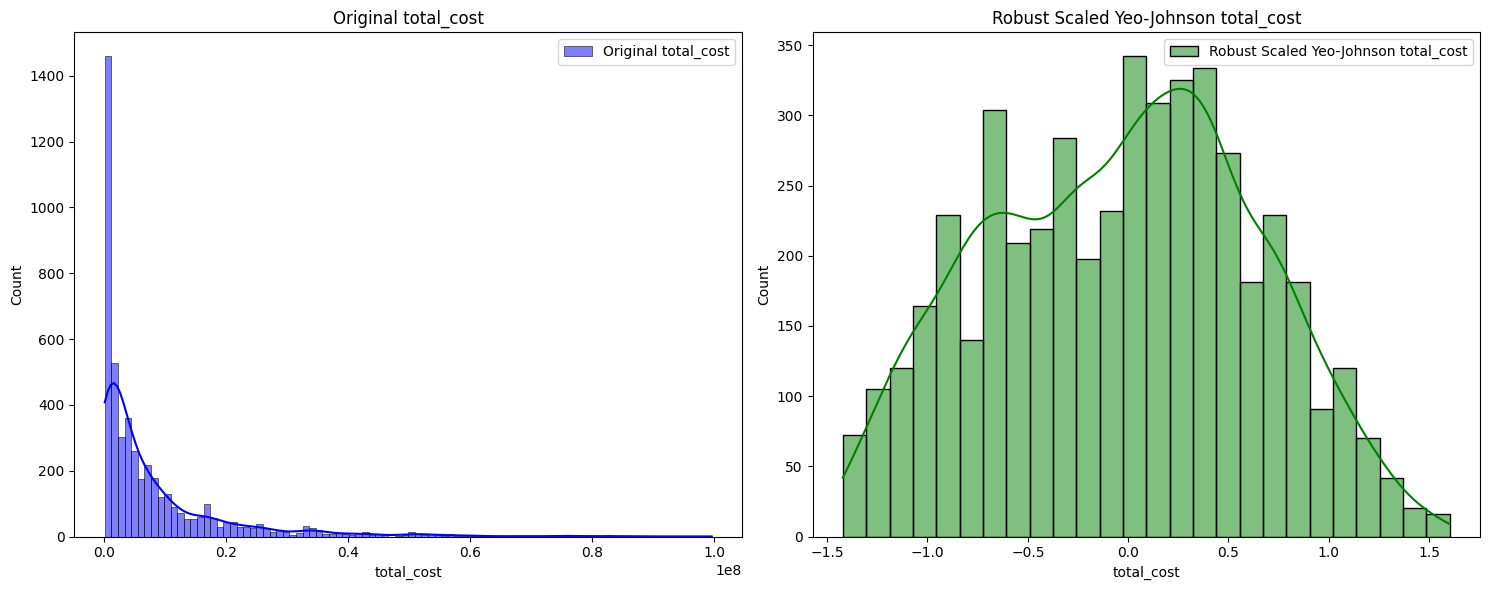

In [ ]:
plt.figure(figsize=(15, 6))

# Plot original total_cost from train_df (subplot 1)
plt.subplot(1, 2, 1)
sns.histplot(train_df['total_cost'], label="Original total_cost", kde=True, color='blue', alpha=0.5)
plt.title("Original total_cost")
plt.legend()

# Plot Robust scaled Yeo-Johnson total_cost from yeojohnson_robust_scaled (subplot 2)
plt.subplot(1, 2, 2)
sns.histplot(yeojohnson_robust_scaled['total_cost'], label="Robust Scaled Yeo-Johnson total_cost", kde=True, color='green', alpha=0.5)
plt.title("Robust Scaled Yeo-Johnson total_cost")
plt.legend()

plt.tight_layout()
plt.show()
plt.show()


#**Feature Engineering**

##Feature Construction

### Train data new features

In [ ]:
train_yeojohnson_df["total_people"] = ( train_yeojohnson_df["total_female"].fillna(0) + train_yeojohnson_df["total_male"].fillna(0))
train_yeojohnson_df["total_nights"] = train_yeojohnson_df["night_mainland"] + train_yeojohnson_df["night_zanzibar"]
print(train_yeojohnson_df[["total_people", "total_nights"]].head(15))

# check for invalid rows with 0 total people or 0 total nights
rows_to_remove_train = (train_yeojohnson_df['total_people'] == 0) | (train_yeojohnson_df['total_nights'] == 0)
num_rows_removed_train = rows_to_remove_train.sum()

if num_rows_removed_train > 0:
    train_yeojohnson_df = train_yeojohnson_df[~rows_to_remove_train].copy()
    print(f"Removed {num_rows_removed_train} rows from training data where total_people or total_nights was 0.")
else:
    print("No rows with total_people or total_nights equal to 0 found in training data.")

    total_people  total_nights
0       0.391083      0.202360
1       0.391083      2.503926
2      -1.249660      0.300711
3       0.391083     -0.019540
4       0.391083      1.444210
5      -1.249660      1.603411
6      -1.249660     -0.269565
7       0.391083      1.732472
8      -1.249660     -1.108613
9       0.391083     -0.903913
10      0.391083      2.458953
11      1.436215      1.060650
12     -1.249660      1.853436
13      1.436215     -0.140504
14     -1.249660     -1.627966
No rows with total_people or total_nights equal to 0 found in training data.


> Total People:

This feature aggregates the number of females and males into a single, holistic measure of the total group size. The number of people traveling together is often a primary driver of cost (e.g., more rooms, more food, more activity tickets). It provides a more direct and intuitive predictor than two separate "gender count" columns

> Total Nights:

This feature combines the nights spent in two distinct regions (mainland Tanzania and Zanzibar) into a total duration of stay. The length of a trip is another fundamental determinant of overall expenditure (accommodation, activities, local transport over time).

In [ ]:
train_yeojohnson_df["is_first_trip"] = train_df["first_trip_tz"].map({"Yes": 1, "No": 0})
train_yeojohnson_df["impression_word_count"] = train_df["most_impressing"].fillna("").apply(lambda x: len(str(x).split()))
print(train_yeojohnson_df[["impression_word_count","is_first_trip" ]].head())

   impression_word_count  is_first_trip
0                      2              0
1                      4              1
2                      2              0
3                      2              1
4                      2              1


> Is first trip

Whether it's a tourist's first time in Tanzania could significantly influence their spending patterns (e.g., first-timers might budget more for iconic experiences, while repeat visitors might seek out different or cheaper activities, or already have local connections).


> Impression word count

This extracts a quantifiable metric from a free-text field (most_impressing). The length of the text description might serve as a proxy for the intensity, detail, or significance of what impressed the tourist. For instance, a very detailed impression might correlate with a more complex or expensive trip, or a more engaged tourist. fillna("") is crucial here to prevent errors when trying to split an empty (NaN) entry.




In [ ]:
# total number of package services for each tourist
package_columns = [
    'package_transport_int', 'package_accomodation', 'package_food',
    'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
    'package_insurance'
]

# Mapping dictionary for 'Yes'/'No' to 1/0
yes_no_mapping = {"Yes": 1, "No": 0}
for col in package_columns:
    if col in train_df.columns: # Check if the column exists in the original train_df
        train_yeojohnson_df[f'{col}_binary_temp'] = train_df[col].map(yes_no_mapping)

train_yeojohnson_df.loc[:, 'num_package_services'] = train_yeojohnson_df[[f'{col}_binary_temp' for col in package_columns if f'{col}_binary_temp' in train_yeojohnson_df.columns]].sum(axis=1)

train_yeojohnson_df = train_yeojohnson_df.drop(columns=[f'{col}_binary_temp' for col in package_columns if f'{col}_binary_temp' in train_yeojohnson_df.columns])

print("'num_package_services':")
print(train_yeojohnson_df[['num_package_services']].head(15))

'num_package_services':
    num_package_services
0                      0
1                      0
2                      0
3                      5
4                      0
5                      2
6                      0
7                      7
8                      0
9                      0
10                     0
11                     0
12                     0
13                     4
14                     0


> Number of package services

 This feature creates a composite score of the comprehensiveness of the tour package. Instead of having multiple binary flags (one for each service like transport, food, accommodation, etc.), num_package_services provides a single numerical value indicating how many services were included. A higher count directly implies a more inclusive and likely more expensive package, capturing the "level" of package chosen.

In [ ]:
train_df.country.unique()

array(['SWIZERLAND', 'UNITED KINGDOM', 'CHINA', 'SOUTH AFRICA',
       'UNITED STATES OF AMERICA', 'NIGERIA', 'INDIA', 'BRAZIL', 'CANADA',
       'MALT', 'MOZAMBIQUE', 'RWANDA', 'AUSTRIA', 'MYANMAR', 'GERMANY',
       'KENYA', 'ALGERIA', 'IRELAND', 'DENMARK', 'SPAIN', 'FRANCE',
       'ITALY', 'EGYPT', 'QATAR', 'MALAWI', 'JAPAN', 'SWEDEN',
       'NETHERLANDS', 'UAE', 'UGANDA', 'AUSTRALIA', 'YEMEN',
       'NEW ZEALAND', 'BELGIUM', 'NORWAY', 'ZIMBABWE', 'ZAMBIA', 'CONGO',
       'BURGARIA', 'PAKISTAN', 'GREECE', 'MAURITIUS', 'DRC', 'OMAN',
       'PORTUGAL', 'KOREA', 'SWAZILAND', 'TUNISIA', 'KUWAIT', 'DOMINICA',
       'ISRAEL', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
       'BURUNDI', 'SCOTLAND', 'RUSSIA', 'GHANA', 'NIGER', 'MALAYSIA',
       'COLOMBIA', 'LUXEMBOURG', 'NEPAL', 'POLAND', 'SINGAPORE',
       'LITHUANIA', 'HUNGARY', 'INDONESIA', 'TURKEY', 'TRINIDAD TOBACCO',
       'IRAQ', 'SLOVENIA', 'UNITED ARAB EMIRATES', 'COMORO', 'SRI LANKA',
       'IRAN', 'MONTENEGRO', 

In [ ]:
country_to_continent = {
    'SWIZERLAND': 'Europe', 'UNITED KINGDOM': 'Europe', 'CHINA': 'Asia',
    'SOUTH AFRICA': 'Africa', 'UNITED STATES OF AMERICA': 'North America',
    'NIGERIA': 'Africa', 'INDIA': 'Asia', 'BRAZIL': 'South America',
    'CANADA': 'North America', 'MALT': 'Europe', 'MOZAMBIQUE': 'Africa',
    'RWANDA': 'Africa', 'AUSTRIA': 'Europe', 'MYANMAR': 'Asia',
    'GERMANY': 'Europe', 'KENYA': 'Africa', 'ALGERIA': 'Africa',
    'IRELAND': 'Europe', 'DENMARK': 'Europe', 'SPAIN': 'Europe',
    'FRANCE': 'Europe', 'ITALY': 'Europe', 'EGYPT': 'Africa', 'QATAR': 'Asia',
    'MALAWI': 'Africa', 'JAPAN': 'Asia', 'SWEDEN': 'Europe',
    'NETHERLANDS': 'Europe', 'UAE': 'Asia', 'UGANDA': 'Africa',
    'AUSTRALIA': 'Oceania', 'YEMEN': 'Asia', 'NEW ZEALAND': 'Oceania',
    'BELGIUM': 'Europe', 'NORWAY': 'Europe', 'ZIMBABWE': 'Africa',
    'ZAMBIA': 'Africa', 'CONGO': 'Africa', 'BURGARIA': 'Europe',
    'PAKISTAN': 'Asia', 'GREECE': 'Europe', 'MAURITIUS': 'Africa',
    'DRC': 'Africa', 'OMAN': 'Asia', 'PORTUGAL': 'Europe', 'KOREA': 'Asia',
    'SWAZILAND': 'Africa', 'TUNISIA': 'Africa', 'KUWAIT': 'Asia',
    'DOMINICA': 'North America', 'ISRAEL': 'Asia', 'FINLAND': 'Europe',
    'CZECH REPUBLIC': 'Europe', 'UKRAIN': 'Europe', 'ETHIOPIA': 'Africa',
    'BURUNDI': 'Africa', 'SCOTLAND': 'Europe', 'RUSSIA': 'Europe',
    'GHANA': 'Africa', 'NIGER': 'Africa', 'MALAYSIA': 'Asia',
    'COLOMBIA': 'South America', 'LUXEMBOURG': 'Europe', 'NEPAL': 'Asia',
    'POLAND': 'Europe', 'SINGAPORE': 'Asia', 'LITHUANIA': 'Europe',
    'HUNGARY': 'Europe', 'INDONESIA': 'Asia', 'TURKEY': 'Asia',
    'TRINIDAD TOBACCO': 'North America', 'IRAQ': 'Asia', 'SLOVENIA': 'Europe',
    'UNITED ARAB EMIRATES': 'Asia', 'COMORO': 'Africa', 'SRI LANKA': 'Asia',
    'IRAN': 'Asia', 'MONTENEGRO': 'Europe', 'ANGOLA': 'Africa',
    'LEBANON': 'Asia', 'SLOVAKIA': 'Europe', 'ROMANIA': 'Europe',
    'MEXICO': 'North America', 'LATVIA': 'Europe', 'CROATIA': 'Europe',
    'CAPE VERDE': 'Africa', 'SUDAN': 'Africa', 'COSTARICA': 'North America',
    'CHILE': 'South America', 'NAMIBIA': 'Africa', 'TAIWAN': 'Asia',
    'SERBIA': 'Europe', 'LESOTHO': 'Africa', 'GEORGIA': 'Asia',
    'PHILIPINES': 'Asia', 'IVORY COAST': 'Africa', 'MADAGASCAR': 'Africa',
    'DJIBOUT': 'Africa', 'CYPRUS': 'Europe', 'ARGENTINA': 'South America',
    'URUGUAY': 'South America', 'MORROCO': 'Africa', 'THAILAND': 'Asia',
    'BERMUDA': 'North America', 'ESTONIA': 'Europe'
}

train_yeojohnson_df['continent'] = train_df['country'].map(country_to_continent)
print(train_yeojohnson_df[['continent']].head())

  continent
0    Europe
1    Europe
2    Europe
3    Europe
4      Asia


> Continent


This transforms a high-cardinality categorical feature (country) into a lower-cardinality categorical feature (continent). Grouping countries by continent captures broad geographical and potentially socio-economic similarities. Tourists from certain continents might have distinct travel behaviors, budget expectations, or preferences that influence their total expenditure. It also simplifies the feature space for modeling compared to one-hot encoding every single country.

### Test Data new features

In [ ]:
test_yeojohnson_df["total_people"] = (test_yeojohnson_df["total_female"].fillna(0) + test_yeojohnson_df["total_male"].fillna(0))
test_yeojohnson_df["total_nights"] = (test_yeojohnson_df["night_mainland"] + test_yeojohnson_df["night_zanzibar"])

test_yeojohnson_df["is_first_trip"] = test_df["first_trip_tz"].map(yes_no_mapping)
test_yeojohnson_df["is_first_trip"] = test_yeojohnson_df["is_first_trip"].fillna(-1)

test_yeojohnson_df["impression_word_count"] = (test_df["most_impressing"].fillna("").apply(lambda x: len(str(x).split())))

for col in package_columns:
    if col in test_df.columns: # This line was causing the IndentationError
        test_yeojohnson_df[f'{col}_binary_temp'] = test_df[col].map(yes_no_mapping)

test_yeojohnson_df.loc[:, 'num_package_services'] = test_yeojohnson_df[[
    f'{col}_binary_temp' for col in package_columns if f'{col}_binary_temp' in test_yeojohnson_df.columns]].sum(axis=1)

test_yeojohnson_df = test_yeojohnson_df.drop(columns=[f'{col}_binary_temp' for col in package_columns if f'{col}_binary_temp' in test_yeojohnson_df.columns])
test_yeojohnson_df['continent'] = test_df['country'].map(country_to_continent).fillna('Unknown')

###Encode Categorical Variables

### *Train Data*

Ordinal encode 'age_group'

In [ ]:
print(train_df['age_group'].unique())
age_order = ['1-24', '25-44', '45-64', '65+']
ordinal_encoder_age = OrdinalEncoder(categories=[age_order], handle_unknown='use_encoded_value', unknown_value=-1)

train_yeojohnson_df["age_group_encoded"] = ordinal_encoder_age.fit_transform(train_df[["age_group"]])

['45-64' '25-44' '1-24' '65+']


Target encode 'main_activity'

In [ ]:
main_activity_target_map = train_df.groupby('main_activity').apply(lambda x: train_yeojohnson_df.loc[x.index, 'total_cost'].mean(), include_groups=False).to_dict()
overall_mean_transformed_cost_ma = train_yeojohnson_df['total_cost'].mean()

train_yeojohnson_df["main_activity_target_enc"] = train_df["main_activity"].map(main_activity_target_map).fillna(overall_mean_transformed_cost_ma)

Target Encoding for 'country'

In [ ]:
country_target_map = train_df.groupby('country')['total_cost'].apply(lambda x: train_yeojohnson_df.loc[x.index, 'total_cost'].mean(),include_groups=False)
overall_mean_cost = train_yeojohnson_df['total_cost'].mean()

train_yeojohnson_df['country_encoded'] = train_df['country'].map(country_target_map).fillna(overall_mean_cost)

In [ ]:
train_yeojohnson_df

,total_female,total_male,night_mainland,night_zanzibar,total_cost,total_people,total_nights,is_first_trip,impression_word_count,num_package_services,continent,age_group_encoded,main_activity_target_enc,country_encoded
0,0.391083,0.0,0.964054,-0.761694,-0.870768,0.391083,0.202360,0,2,0,Europe,2.0,0.234586,0.384413
1,0.391083,0.0,1.066613,1.437314,0.017774,0.391083,2.503926,1,4,0,Europe,1.0,-0.420362,0.048193
2,-1.249660,0.0,-1.227336,1.528048,0.036527,-1.249660,0.300711,0,2,0,Europe,1.0,-0.420362,0.048193
3,0.391083,0.0,0.742153,-0.761694,0.580945,0.391083,-0.019540,1,2,5,Europe,1.0,0.234586,0.048193
4,0.391083,0.0,0.203495,1.240715,-0.374820,0.391083,1.444210,1,2,0,Asia,0.0,0.234586,0.043774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,-1.249660,0.0,-0.866273,-0.761694,0.036527,-1.249660,-1.627966,0,2,0,Asia,2.0,-0.876542,-0.012240
4805,0.391083,0.0,0.742153,-0.761694,0.793711,0.391083,-0.019540,1,2,7,North America,1.0,0.234586,0.472379
4806,0.391083,0.0,-0.583230,1.437314,-0.197556,0.391083,0.854084,1,2,0,Europe,0.0,0.234586,0.322388
4807,0.391083,0.0,-0.142220,-0.761694,-0.576508,0.391083,-0.903913,0,2,3,Africa,1.0,0.039452,0.070709


### *Test Data*

In [ ]:
test_yeojohnson_df["age_group_encoded"] = ordinal_encoder_age.transform(test_df[["age_group"]])
test_yeojohnson_df["main_activity_target_enc"] = test_df["main_activity"].map(main_activity_target_map).fillna(overall_mean_transformed_cost_ma)
test_yeojohnson_df['country_encoded'] = test_df['country'].map(country_target_map).fillna(overall_mean_cost)
test_yeojohnson_df

,total_female,total_male,night_mainland,night_zanzibar,total_people,total_nights,is_first_trip,impression_word_count,num_package_services,continent,age_group_encoded,main_activity_target_enc,country_encoded
0,0.391083,0.0,0.621190,1.111282,0.391083,1.732472,1,1,7,Oceania,2.0,0.234586,0.621556
1,-1.249660,0.0,0.964054,-0.761694,-1.249660,0.202360,0,4,2,Africa,1.0,0.234586,0.070709
2,1.851189,0.0,0.203495,1.528048,1.851189,1.731542,0,2,0,Europe,1.0,0.039452,0.322784
3,1.436215,0.0,-1.754679,1.240715,1.436215,-0.513964,1,2,0,North America,-1.0,-0.420362,0.382305
4,1.436215,0.0,0.621190,-0.761694,1.436215,-0.140504,1,2,4,Europe,2.0,0.234586,0.048193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,-1.249660,0.0,-1.227336,-0.761694,-1.249660,-1.989030,0,2,0,North America,1.0,-0.706667,0.472379
1597,1.851189,0.0,0.621190,1.327670,1.851189,1.948860,1,1,4,Europe,2.0,0.234586,0.446424
1598,-1.249660,0.0,0.039455,-0.761694,-1.249660,-0.722239,1,2,0,Europe,1.0,-0.706667,0.137230
1599,-1.249660,0.0,-0.346919,-0.761694,-1.249660,-1.108613,1,1,0,Africa,-1.0,0.039452,0.070709


###One-Hot encoding on remaining categorical features

In [ ]:
# categorical_cols = df_standard.select_dtypes(include=['object']).columns
# encoded_df = pd.get_dummies(df_standard, columns=categorical_cols, drop_first=False)
# encoded_df.info()

categorical_cols_for_ohe_final = ['continent']

train_ohe = pd.get_dummies(train_yeojohnson_df[categorical_cols_for_ohe_final], drop_first=False)
test_ohe = pd.get_dummies(test_yeojohnson_df[categorical_cols_for_ohe_final], drop_first=False)

train_ohe, test_ohe = train_ohe.align(test_ohe, join='left', axis=1, fill_value=0)

train_final_df = pd.concat([train_yeojohnson_df.drop(columns=categorical_cols_for_ohe_final, errors='ignore').reset_index(drop=True),
                            train_ohe.reset_index(drop=True)], axis=1)
test_final_df = pd.concat([test_yeojohnson_df.drop(columns=categorical_cols_for_ohe_final, errors='ignore').reset_index(drop=True),test_ohe.reset_index(drop=True)], axis=1)

print("\nFinal training set shape:", train_final_df.shape)
print("Final test set shape:", test_final_df.shape)
print("Final training columns sample:")
print(train_final_df.columns.tolist())


Final training set shape: (4809, 19)
Final test set shape: (1601, 18)
Final training columns sample:
['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost', 'total_people', 'total_nights', 'is_first_trip', 'impression_word_count', 'num_package_services', 'age_group_encoded', 'main_activity_target_enc', 'country_encoded', 'continent_Africa', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America']


In [ ]:
print(f"\nData types in train_final_df:\n{train_final_df.dtypes.value_counts()}")
print(f"\nData types in test_final_df:\n{test_final_df.dtypes.value_counts()}")


Data types in train_final_df:
float64    10
bool        6
int64       3
Name: count, dtype: int64

Data types in test_final_df:
float64    9
bool       6
int64      3
Name: count, dtype: int64


##Feature Selection/ Reduction

In [ ]:
# cols_to_drop = ["ID", "first_trip_tz", "most_impressing", "age_group", "main_activity"]
# cols_to_drop_existing = [col for col in cols_to_drop if col in train_yeojohnson_df.columns]
# train_yeojohnson_df = train_yeojohnson_df.drop(columns=cols_to_drop_existing)

# no point as we already encoded and feature construction

Filter Method (Variance Threshold)

In [ ]:
# num_cols = train_yeojohnson_df.select_dtypes(include=['float64', 'int64']).columns
# selector = VarianceThreshold(threshold=0.01)
# data_reduced = selector.fit_transform(numerical_df)

train_features_for_variance = train_final_df.drop(columns=['total_cost'])
test_features_for_variance = test_final_df.copy()
train_target = train_final_df['total_cost']

train_features_for_variance = train_features_for_variance.select_dtypes(include=[np.number, bool])
test_features_for_variance = test_features_for_variance.select_dtypes(include=[np.number, bool])

# Align test features columns to exactly match train features columns in order and presence
test_features_for_variance = test_features_for_variance.reindex(columns=train_features_for_variance.columns, fill_value=0)

selector = VarianceThreshold(threshold=0.01)

features_reduced_train_array = selector.fit_transform(train_features_for_variance)
features_reduced_test_array = selector.transform(test_features_for_variance)

# Get the names of the features that were selected by the VarianceThreshold
selected_feature_names = selector.get_feature_names_out(train_features_for_variance.columns)

train_final_df_features_only = pd.DataFrame(features_reduced_train_array, columns=selected_feature_names, index=train_final_df.index)

test_final_df = pd.DataFrame(features_reduced_test_array, columns=selected_feature_names, index=test_final_df.index)


# Recombine the reduced features with the target variable for train_final_df
train_final_df = pd.concat([train_final_df_features_only, train_target], axis=1)

print("\nShape of train_final_df after variance thresholding:", train_final_df.shape)
print("Shape of test_final_df after variance thresholding:", test_final_df.shape)

print("\nColumns in train_final_df after reduction:")
print(train_final_df.columns.tolist())
print("\nColumns in test_final_df after reduction:")
print(test_final_df.columns.tolist())

print(f"\nData types in train_final_df after reduction:\n{train_final_df.dtypes.value_counts()}")
print(f"\nData types in test_final_df after reduction:\n{test_final_df.dtypes.value_counts()}")
print("Do train and test features match exactly?",
      list(train_final_df.drop(columns='total_cost').columns) == list(test_final_df.columns))


Shape of train_final_df after variance thresholding: (4809, 17)
Shape of test_final_df after variance thresholding: (1601, 16)

Columns in train_final_df after reduction:
['total_female', 'night_mainland', 'night_zanzibar', 'total_people', 'total_nights', 'is_first_trip', 'impression_word_count', 'num_package_services', 'age_group_encoded', 'main_activity_target_enc', 'country_encoded', 'continent_Africa', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'total_cost']

Columns in test_final_df after reduction:
['total_female', 'night_mainland', 'night_zanzibar', 'total_people', 'total_nights', 'is_first_trip', 'impression_word_count', 'num_package_services', 'age_group_encoded', 'main_activity_target_enc', 'country_encoded', 'continent_Africa', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania']

Data types in train_final_df after reduction:
float64    17
Name: count, dtype: int64

Data types in test_final_df after

 You'll notice that the columns 'total_male' and 'continent_South America' are no longer present in either DataFrame's feature list.

> Key Observation:

Reason: This is the direct result of VarianceThreshold(threshold=0.01). It means that for these two features (total_male and continent_South America), their variance was extremely low (less than or equal to 0.01) in your training data, indicating they were almost constant or had very little variation. The VarianceThreshold selector removed them because they provide little to no information for the model.

Filter Method (Correlation Coefficient)

In [ ]:
corr_matrix = train_final_df.corr()
target_corr = corr_matrix['total_cost'].drop('total_cost')  # drop self correlation

threshold = 0.3 # A value of ±0.3 is often considered a moderate correlation
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()

print(f"Selected features based on correlation threshold {threshold}:")
print(selected_features)

train_final_df = train_final_df[selected_features + ['total_cost']].copy()
test_final_df = test_final_df[selected_features].copy()

Selected features based on correlation threshold 0.3:
['total_female', 'night_zanzibar', 'total_people', 'total_nights', 'is_first_trip', 'num_package_services', 'main_activity_target_enc', 'country_encoded', 'continent_Africa']


Wrapper Method Recursive Feature Elimination (RFE)

In [ ]:
x_train = train_final_df.drop(columns=['total_cost']).fillna(0)
y_train = train_final_df['total_cost']

rfe_model = LinearRegression()
rfe = RFE(estimator=rfe_model, n_features_to_select=5)
rfe.fit(x_train, y_train)

selected_rfe_features = x_train.columns[rfe.support_].tolist()
print("RFE Selected Features:", selected_rfe_features)

x_test = test_final_df[selected_rfe_features].fillna(0)

X_train_rfe = x_train[selected_rfe_features]
X_test_rfe = x_test


train_final_df = pd.concat([X_train_rfe, y_train], axis=1)
test_final_df = x_test[selected_rfe_features].fillna(0)

print("\nShape of training data after RFE feature selection:", train_final_df.shape)
print("Shape of test data after RFE feature selection:", test_final_df.shape)

RFE Selected Features: ['total_people', 'num_package_services', 'main_activity_target_enc', 'country_encoded', 'continent_Africa']

Shape of training data after RFE feature selection: (4809, 6)
Shape of test data after RFE feature selection: (1601, 5)


###Apply PCA

In [ ]:
# cols_to_drop = ["ID", "first_trip_tz", "most_impressing", "age_group", "main_activity"]
# train_df.drop(columns=[col for col in cols_to_drop if col in train_df.columns], inplace=True)
# num_cols = numeric_df.select_dtypes(include=['float64', 'int64']).columns
# numeric_df[num_cols] = SimpleImputer(strategy="mean").fit_transform(numeric_df[num_cols])
# selector = VarianceThreshold(threshold=0.01)
# data_reduced = selector.fit_transform(numeric_df)#

# max_components = min(data_reduced.shape[1], 10)
# reduced_df = pd.DataFrame(data_reduced, columns=selector.get_feature_names_out())
# pca = PCA(n_components=max_components, random_state=42)
# data_pca = pca.fit_transform(data_reduced)

# data_pca.shape
# selected_columns = numeric_df.columns[selector.get_support()]
# print(selected_columns.tolist())

# pca.explained_variance_ratio_
# pca_components = pd.DataFrame(
#     pca.components_,
#     columns=reduced_df.columns,
#     index=[f'PC{i+1}' for i in range(pca.n_components_)])
# display(pca_components.T.sort_values(by='PC1', key=abs, ascending=False).head(10))

In [ ]:
features = ['total_people', 'num_package_services', 'main_activity_target_enc', 'country_encoded', 'continent_Africa']

x_train = train_final_df[features].dropna()
y_train = train_final_df.loc[x_train.index, 'total_cost']

scaler = StandardScaler()
scaled_train = scaler.fit_transform(x_train)

pca = PCA(n_components=0.95)
principal_components_train = pca.fit_transform(scaled_train)

pca_train_df = pd.DataFrame(principal_components_train, columns=[f'PC{i+1}' for i in range(principal_components_train.shape[1])])

x_test = test_final_df[features].dropna()
scaled_test = scaler.transform(x_test)
principal_components_test = pca.transform(scaled_test)

pca_test_df = pd.DataFrame(principal_components_test, columns=[f'PC{i+1}' for i in range(principal_components_test.shape[1])])

In [ ]:
pca_train_df

,PC1,PC2,PC3,PC4
0,0.620873,-0.095057,-0.313792,-1.256905
1,-0.276043,-1.262080,-0.714555,-0.462893
2,-0.840746,-0.202526,-1.752600,-0.048828
3,1.143277,0.267351,0.392672,0.352336
4,0.311606,-0.043511,-0.091326,-1.213429
...,...,...,...,...
4804,-1.307714,-1.041667,-2.145211,0.482037
4805,1.859461,0.327775,0.310397,0.924727
4806,0.564560,-0.085671,-0.273284,-1.248989
4807,-0.503115,0.043858,1.102532,0.308065


In [ ]:
pca_test_df

,PC1,PC2,PC3,PC4
0,1.994899,0.305201,0.212972,0.905687
1,-1.057073,1.403964,0.151933,0.185084
2,0.891174,-1.391491,0.465396,-1.393738
3,0.387007,-1.987560,-0.271537,-0.769292
4,1.337454,-0.469878,0.956516,-0.224684
...,...,...,...,...
1596,-0.714265,-0.799109,-2.300807,0.225369
1597,1.841833,-0.798118,0.958979,-0.380236
1598,-1.018549,-0.748394,-2.081927,0.268145
1599,-1.564414,0.916494,-0.227644,-0.217666


In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"PCA-transformed test shape: {pca_test_df.shape}")
print(f"PCA-transformed training shape: {pca_train_df.shape}")
print(f"Explained variance by each PC: {explained_variance}")
print(f"Total variance retained: {explained_variance.sum():.2f}")
print(f"Number of components retained: {pca.n_components_}")

train_pca_df = pd.concat([pca_train_df.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_pca_df = pca_test_df.reset_index(drop=True)

PCA-transformed test shape: (1601, 4)
PCA-transformed training shape: (4809, 4)
Explained variance by each PC: [0.53371718 0.1669979  0.14945075 0.11453957]
Total variance retained: 0.96
Number of components retained: 4


###Apply LDA

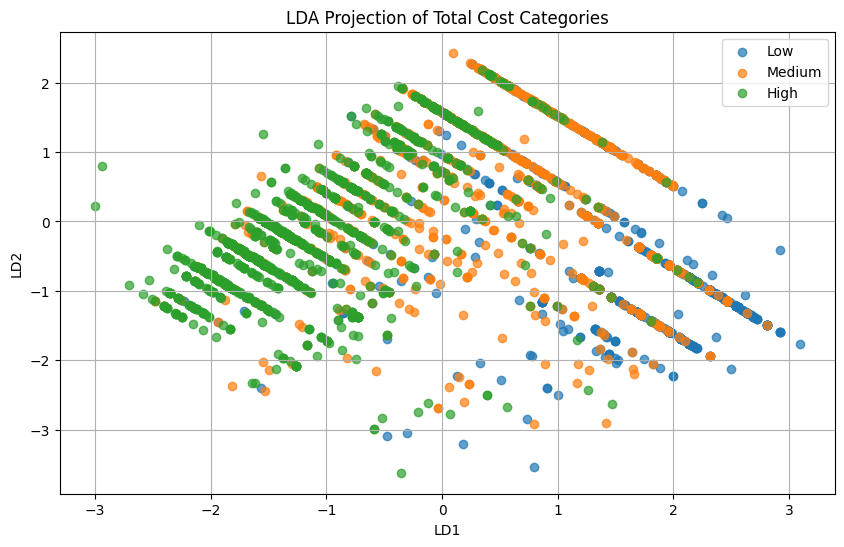

In [ ]:
train_final_df['CostCategory'] = pd.qcut(train_final_df['total_cost'], q=3, labels=['Low', 'Medium', 'High'])
features = ['total_people', 'num_package_services', 'main_activity_target_enc', 'country_encoded', 'continent_Africa']
X_lda = train_final_df[features].fillna(0)
y_lda = train_final_df['CostCategory']
scaler = StandardScaler()
X_lda_scaled = scaler.fit_transform(X_lda)
lda = LDA(n_components=2)
X_lda_proj = lda.fit_transform(X_lda_scaled, y_lda)

plt.figure(figsize=(10,6))

for label in ['Low', 'Medium', 'High']:
    plt.scatter(
        X_lda_proj[np.array(y_lda) == label, 0],
        X_lda_proj[np.array(y_lda) == label, 1],
        label=label,
        alpha=0.7
    )
plt.title('LDA Projection of Total Cost Categories')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid(True)
plt.show()

#**Model Training**

##Validate Feature Utility and Check for Data Leakage

In [ ]:
x = train_pca_df.drop(columns=['total_cost'])
y = train_pca_df['total_cost']

# Train-test split (80% train, 20% test)
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print(f"CV R^2 score on training set: {cv_scores.mean()}")

CV R^2 score on training set: 0.45356841590025654


In [ ]:
model.fit(x_train, y_train)
r2_val = model.score(x_val, y_val)
print(f"R^2 score on validation set: {r2_val}")

R^2 score on validation set: 0.450052431191296


##Hyperparameter Tuning, Evaluate and Compare Models

In [ ]:
def evaluate_model(model, X, y, name="Model"):
    preds = model.predict(X)
    r2 = r2_score(y, preds)
    rmse = np.sqrt(mean_squared_error(y, preds))
    mae = mean_absolute_error(y, preds)
    print(f"{name} - R^2: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return {'r2': r2, 'rmse': rmse, 'mae': mae}

param_grids = {
    "Support Vector Regression": {
        'kernel': ['rbf', 'linear'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Linear Regression": {}  # No hyperparameters to tune
}

models_to_tune = {
    "Support Vector Regression": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

best_models = {}
results = {}

for name in models_to_tune:
    print(f"\nTuning hyperparameters for {name}...")

    if param_grids[name]:  # If there are hyperparameters to tune
        grid_search = GridSearchCV(
            models_to_tune[name],
            param_grids[name],
            cv=3,
            scoring='neg_mean_absolute_error',
            n_jobs=-1
        )
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best params for {name}: {grid_search.best_params_}")
    else:
        best_model = models_to_tune[name]
        best_model.fit(x_train, y_train)
        print("No hyperparameters to tune.")

    best_models[name] = best_model
    results[name] = evaluate_model(best_model, x_val, y_val, name=name)


Tuning hyperparameters for Support Vector Regression...
Best params for Support Vector Regression: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Support Vector Regression - R^2: 0.4853, RMSE: 0.7042, MAE: 0.5228

Tuning hyperparameters for Random Forest...
Best params for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest - R^2: 0.4804, RMSE: 0.7076, MAE: 0.5374

Tuning hyperparameters for Decision Tree...
Best params for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree - R^2: 0.4426, RMSE: 0.7328, MAE: 0.5531

Tuning hyperparameters for Linear Regression...
No hyperparameters to tune.
Linear Regression - R^2: 0.4720, RMSE: 0.7133, MAE: 0.5451


Support Vector Regression model with the tuned parameters appears to be best performing model for this dataset achieving the lowest Mean Absolute Error (MAE) of 0.5228

## Train Models

In [ ]:
# best_svr_model = best_models["Support Vector Regression"]

# final_test_predictions = best_svr_model.predict(test_pca_df)

# print(f"Generated {len(final_test_predictions)} predictions.")
# print(f"Sample of final predictions: {final_test_predictions[:10]}")

# submission_df = pd.DataFrame({
#     'ID': original_test_df.ID,
#     'Predicted_Total_Cost': final_test_predictions
# })

# submission_df.to_csv('submission.csv', index=False)

# print("\nPredictions saved to submission.csv")
# print("\nSample Submission DataFrame Head:")
# print(submission_df.head())

In [ ]:
pt_total_cost = fitted_power_transformers['total_cost']

best_svr_model = best_models["Support Vector Regression"]
final_test_predictions_scaled = best_svr_model.predict(test_pca_df) # These are the scaled/transformed predictions
final_test_predictions_original_scale = pt_total_cost.inverse_transform(final_test_predictions_scaled.reshape(-1, 1)).flatten()

submission_df = pd.DataFrame({
    'test_id': original_test_df['ID'],
    'total_cost': final_test_predictions_original_scale
})

submission_df.to_csv('submission.csv', index=False)

print("\nSample Submission DataFrame:")
print(submission_df.head())
print(submission_df.describe())
print(submission_df['total_cost'].min(), submission_df['total_cost'].max())


Sample Submission DataFrame:
     test_id    total_cost
0     tour_1  1.730697e+07
1   tour_100  2.477463e+06
2  tour_1001  4.740945e+06
3  tour_1006  1.935765e+06
4  tour_1009  1.185471e+07
         total_cost
count  1.601000e+03
mean   6.018357e+06
std    6.089376e+06
min    1.125636e+05
25%    1.376665e+06
50%    3.450987e+06
75%    9.766814e+06
max    3.335878e+07
112563.57627780814 33358782.466859076
